In [26]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [27]:
df0 = pd.read_csv('pits_25_54_all.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 52 columns):
Rank                  4478 non-null object
NET                   4478 non-null object
Program               4478 non-null object
Genre                 4478 non-null object
Daypart               4478 non-null object
Date                  4478 non-null object
Day                   4478 non-null object
Time                  4478 non-null object
[MXM-PGM] PAL         4478 non-null object
[MXM-PGM] PAL.1       4478 non-null object
[MXM-PGM] PAL.2       4478 non-null object
[MXM-PGM] PAL.3       4478 non-null object
[MXM-PGM] PAL.4       4478 non-null object
[MXM-PGM] PAL.5       4478 non-null object
[MXM-PGM] PAL.6       4478 non-null object
[MXM-PGM] PAL.7       4478 non-null object
[MXM-PGM] PAL.8       4478 non-null object
[MXM-PGM] PAL.9       4478 non-null object
[MXM-PGM] PAL.10      4478 non-null object
[MXM-PGM] LSD         4478 non-null object
[MXM-PGM] LSD.1       4478 non-nu

In [28]:
df1=df0.iloc[:,:8]
df2=df0.iloc[:,8:41]
df3=df0.iloc[:,41:]
df2.columns=df2.columns.str.split(' ').str[1].str.split('.').str[0]
df3.columns=df3.columns.str.split(' ').str[1].str.split('.').str[0].str.split('/').str[1]
df4=pd.concat([df2,df3],axis=1)
col_names1=df4[:1].values.tolist()[0]
col_names2=df4.columns.tolist()
col_names3=[i[0] +' '+i[1] for i in zip (col_names1, col_names2)]
col_names4=[str(i).lower().replace(" ", "_") for i in col_names3]
df4.columns=col_names4
df1.columns = map(str.lower, df1.columns)
df5=pd.concat([df1,df4],axis=1)
df6=df5.iloc[1:,8:]
df6['m._age_pal']=df6['m._age_pal'].replace('65+', '65')
df6['m._age_lsd']=df6['m._age_lsd'].replace('65+', '65')
df6['m._age_l3d']=df6['m._age_l3d'].replace('65+', '65')
df6['m._age_c3']=df6['m._age_c3'].replace('65+', '65')
df6 = df6.apply(pd.to_numeric)
df7=pd.concat([df5.iloc[1:,:8],df6],axis=1)

In [30]:
df7

rank            net                    program    genre  daypart  \
1        1  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
2        2  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
3        3  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
4        4  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
5        5  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
6        6  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
7        7  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
8        8  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
9        9  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
10      10  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
11      11  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
12      12  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
13      13  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
14      14  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
15      15  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
16      16  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
17      17  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
18      18  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
19      19  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
20      20  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
21      21  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
22      22  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
23      23  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
24      24  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
25      25  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
26      26  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
27      27  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
28      28  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
29      29  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
30      30  ANIMAL PLANET  PITBULLS AND PAROLS RECAP  Variety  UNKNOWN   
31      31  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
32      32  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
33      33  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
34      34  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
35      35  ANIMAL PLANET  PIT BULLS PAROLEES: UNCHA  Variety  UNKNOWN   
36      36  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
37      37  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
38      38  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
39      39  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
40      40  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
41      41  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
42      42  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
43      43  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
44      44  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
45      45  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
46      46  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
47      47  ANIMAL PLANET  PIT BULLS PAROLEES: UNCHA  Variety  UNKNOWN   
48      48  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
49      49  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
50      50  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
51      51  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
52      52  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
53      53  ANIMAL PLANET      PITBULLS AND PAROLEES  Variety  UNKNOWN   
54      54

In [29]:
df=df7.drop(['program_time_lsd','commercial_time_lsd','nat_ue_lsd','cvg_ue_lsd',\
             'program_time_l3d','commercial_time_l3d','nat_ue_l3d','cvg_ue_l3d',\
             'program_time_c3','commercial_time_c3','nat_ue_c3','cvg_ue_c3',\
            'net','rank','genre','daypart'], axis=1)

In [5]:
df['gender_ratio_l3d']=df['f%_l3d']/df['m%_l3d']
df['c3/l3']=df['cvg_aa%_c3']/df['cvg_aa%_l3d']
df['program_ratio']=df['program_time_pal']/df['commercial_time_pal']

In [6]:
import re
def time(time):
    if  str(time).startswith("08") and re.search(r'PM',time):
        return '8pm - 9pm'
    if str(time).startswith("09") and re.search(r'PM',str(time)):
        return '9pm - 10pm'
    if str(time).startswith("10") and re.search(r'PM',str(time)):
        return '10pm - 11pm'
    if str(time).startswith("11") and re.search(r'PM',str(time)):
        return '11pm - 12pm'
    else:
        return 'Other than\nPrime Time'
df["prime_time"]=df['time'].map(time)

In [7]:
df_pp=df[df['program']=='PITBULLS AND PAROLEES']
filter_time= ['10pm - 11pm','9pm - 10pm','11pm - 12pm','8pm - 9pm']
df_pp_prime=df_pp[df_pp.prime_time.isin(filter_time)]
df_uchained=df[df['program']=='PIT BULLS PAROLEES: UNCHA']
df_special=df[df['program']=='PITBULLS & PAROLEES SPCL']
df_recap=df[df['program']=='PITBULLS AND PAROLS RECAP']
# df_sneak=df[df['program']=='PITBULLS & PAROLEES:SNEAK']


In [8]:
df['program'].value_counts()

PITBULLS AND PAROLEES        4068
PIT BULLS PAROLEES: UNCHA     305
PITBULLS & PAROLEES SPCL       40
PITBULLS AND PAROLS RECAP      21
PIT BULLS AND PAROL UNLEA      17
PITBULLS & PAROLEES:SNEAK      11
PIT BULLS & PAROLEES: DIR       8
PIT BULLS & PAROLEES: PAC       4
PIT BULLS PAROLEES: AFTER       2
PITBULLS & PAROLEES: FORE       1
Name: program, dtype: int64

In [9]:
def scatter_plot(var1, var2):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES','PITBULLS & PAROLEES','PITBULLS & PAROLEES PRIME TIME','PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES SPCL','PITBULLS & PAROLEES RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
    
    plt.tight_layout(h_pad=13,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        dfx.plot.scatter(x=var1, y=var2,c='DarkBlue',s=10, ax=ax)
        ax.set_title("Relationship between\n" + var1 + " and " + var2+ "\n"+name,\
                  x=.5, fontsize=20,family='serif')
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        print ('\033[1m'+name+'\033[0m')
        print()
        print (dfx[[var1, var2]].corr())
        print()
    plt.show()
    return scatter_plot

In [25]:
df_pp_prime['program_ratio'].sort_values().head(20)

974    4.286
758    4.286
2042   4.545
1246   4.572
1079   4.627
360    4.627
2582   4.627
1140   4.627
1201   4.627
1332   4.627
846    4.633
91     4.633
1904   4.633
1649   4.633
1579   4.639
1198   4.639
1676   4.639
1330   4.639
607    4.651
363    4.651
Name: program_ratio, dtype: float64

In [18]:
df.corr()

program_time_pal  commercial_time_pal  m._age_pal  \
program_time_pal                1.000                0.509      -0.016   
commercial_time_pal             0.509                1.000       0.336   
m._age_pal                     -0.016                0.336       1.000   
m%_pal                          0.002               -0.158      -0.274   
f%_pal                         -0.002                0.158       0.274   
aa_000s_pal                    -0.003               -0.117      -0.446   
nat_aa%_pal                    -0.003               -0.115      -0.442   
cvg_aa%_pal                    -0.004               -0.053      -0.361   
nat_ue_pal                      0.000                0.000       0.000   
cvg_ue_pal                      0.000                0.000       0.000   
comp_pal                        0.018               -0.196      -0.510   
m._age_lsd                     -0.012                0.339       0.992   
m%_lsd                          0.004               -0.168      -0.291   
f%_lsd                         -0.004                0.168       0.291   
aa_000s_lsd                    -0.013               -0.100      -0.399   
nat_aa%_lsd                    -0.014               -0.098      -0.396   
cvg_aa%_lsd                    -0.016               -0.039      -0.314   
comp_lsd                        0.015               -0.196      -0.508   
m._age_l3d                     -0.006                0.343       0.984   
m%_l3d                          0.008               -0.168      -0.297   
f%_l3d                         -0.008                0.168       0.297   
aa_000s_l3d                    -0.034               -0.086      -0.336   
nat_aa%_l3d                    -0.034               -0.084      -0.332   
cvg_aa%_l3d                    -0.038               -0.034      -0.258   
comp_l3d                        0.007               -0.198      -0.505   
m._age_c3                       0.232                0.444       0.931   
m%_c3                           0.179               -0.061      -0.273   
f%_c3                           0.337                0.316       0.229   
aa_000s_c3                      0.103               -0.027      -0.373   
nat_aa%_c3                      0.103               -0.025      -0.369   
cvg_aa%_c3                      0.113                0.040      -0.288   
comp_c3                         0.171               -0.101      -0.485   
gender_ratio_l3d               -0.007                0.108       0.232   
c3/l3                           0.463                0.278       0.100   
program_ratio                   0.002               -0.876      -0.293   

                     m%_pal  f%_pal  aa_000s_pal  nat_aa%_pal  cvg_aa%_pal  \
program_time_pal      0.002  -0.002       -0.003       -0.003       -0.004   
commercial_time_pal  -0.158   0.158       -0.117       -0.115       -0.053   
m._age_pal           -0.274   0.274       -0.446       -0.442       -0.361   
m%_pal                1.000  -1.000        0.052        0.046        0.021   
f%_pal               -1.000   1.000       -0.052       -0.046       -0.021   
aa_000s_pal           0.052  -0.052        1.000        1.000        0.989   
nat_aa%_pal           0.046  -0.046        1.000        1.000        0.989   
cvg_aa%_pal           0.021  -0.021        0.989        0.989        1.000   
nat_ue_pal            0.000  -0.000       -0.000       -0.000        0.000   
cvg_ue_pal            0.000  -0.000       -0.000       -0.000        0.000   
comp_pal              0.155  -0.155        0.481        0.477        0.445   
m._age_lsd           -0.268   0.268       -0.454       -0.450       -0.368   
m%_lsd                0.984  -0.984        0.064        0.058        0.030   
f%_lsd               -0.984   0.984       -0.064       -0.058       -0.030   
aa_000s_lsd           0.024  -0.024        0.984        0.984        0.980   
nat_aa%_lsd           0.019  -0.019        0.982        0.984        0.979   
cvg_aa%_lsd          -0.007   

In [17]:
df_pp_prime.corr()

program_time_pal  commercial_time_pal  m._age_pal  \
program_time_pal                1.000                0.599       0.097   
commercial_time_pal             0.599                1.000       0.542   
m._age_pal                      0.097                0.542       1.000   
m%_pal                         -0.014               -0.242      -0.506   
f%_pal                          0.014                0.242       0.506   
aa_000s_pal                    -0.034               -0.319      -0.448   
nat_aa%_pal                    -0.033               -0.307      -0.433   
cvg_aa%_pal                    -0.018               -0.218      -0.326   
nat_ue_pal                      0.000               -0.000      -0.000   
cvg_ue_pal                      0.000               -0.000      -0.000   
comp_pal                       -0.037               -0.419      -0.640   
m._age_lsd                      0.102                0.552       0.992   
m%_lsd                         -0.006               -0.252      -0.518   
f%_lsd                          0.006                0.252       0.518   
aa_000s_lsd                    -0.028               -0.243      -0.324   
nat_aa%_lsd                    -0.026               -0.232      -0.310   
cvg_aa%_lsd                    -0.012               -0.140      -0.195   
comp_lsd                       -0.040               -0.420      -0.624   
m._age_l3d                      0.100                0.563       0.973   
m%_l3d                         -0.009               -0.260      -0.528   
f%_l3d                          0.009                0.260       0.528   
aa_000s_l3d                    -0.016               -0.158      -0.169   
nat_aa%_l3d                    -0.015               -0.150      -0.158   
cvg_aa%_l3d                    -0.002               -0.069      -0.054   
comp_l3d                       -0.035               -0.410      -0.566   
m._age_c3                       0.100                0.543       0.984   
m%_c3                          -0.001               -0.237      -0.506   
f%_c3                           0.001                0.237       0.506   
aa_000s_c3                     -0.019               -0.191      -0.237   
nat_aa%_c3                     -0.018               -0.182      -0.224   
cvg_aa%_c3                     -0.004               -0.091      -0.110   
comp_c3                        -0.031               -0.398      -0.580   
gender_ratio_l3d               -0.006                0.235       0.492   
c3/l3                           0.009                0.029      -0.090   
program_ratio                  -0.012               -0.805      -0.619   

                     m%_pal  f%_pal  aa_000s_pal  nat_aa%_pal  cvg_aa%_pal  \
program_time_pal     -0.014   0.014       -0.034       -0.033       -0.018   
commercial_time_pal  -0.242   0.242       -0.319       -0.307       -0.218   
m._age_pal           -0.506   0.506       -0.448       -0.433       -0.326   
m%_pal                1.000  -1.000        0.107        0.088        0.031   
f%_pal               -1.000   1.000       -0.107       -0.088       -0.031   
aa_000s_pal           0.107  -0.107        1.000        0.999        0.985   
nat_aa%_pal           0.088  -0.088        0.999        1.000        0.988   
cvg_aa%_pal           0.031  -0.031        0.985        0.988        1.000   
nat_ue_pal            0.000   0.000        0.000       -0.000       -0.000   
cvg_ue_pal            0.000   0.000        0.000       -0.000       -0.000   
comp_pal              0.464  -0.464        0.420        0.402        0.340   
m._age_lsd           -0.482   0.482       -0.459       -0.444       -0.336   
m%_lsd                0.985  -0.985        0.100        0.080        0.020   
f%_lsd               -0.985   0.985       -0.100       -0.080       -0.020   
aa_000s_lsd          -0.004   0.004        0.964        0.967        0.971   
nat_aa%_lsd          -0.020   0.020        0.959        0.964        0.969   
cvg_aa%_lsd          -0.080   

PITBULLS & PAROLEES ALL

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.442
m._age_pal        -0.442       1.000

ONLY PITBULLS & PAROLEES

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.453
m._age_pal        -0.453       1.000

PITBULLS & PAROLEES PRIME TIME

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.433
m._age_pal        -0.433       1.000

PITBULLS & PAROLEES: UNCHA

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.413
m._age_pal        -0.413       1.000

PITBULLS & PAROLEES SPCL

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.431
m._age_pal        -0.431       1.000

PITBULLS & PAROLEES RECAP

             nat_aa%_pal  m._age_pal
nat_aa%_pal        1.000      -0.225
m._age_pal        -0.225       1.000



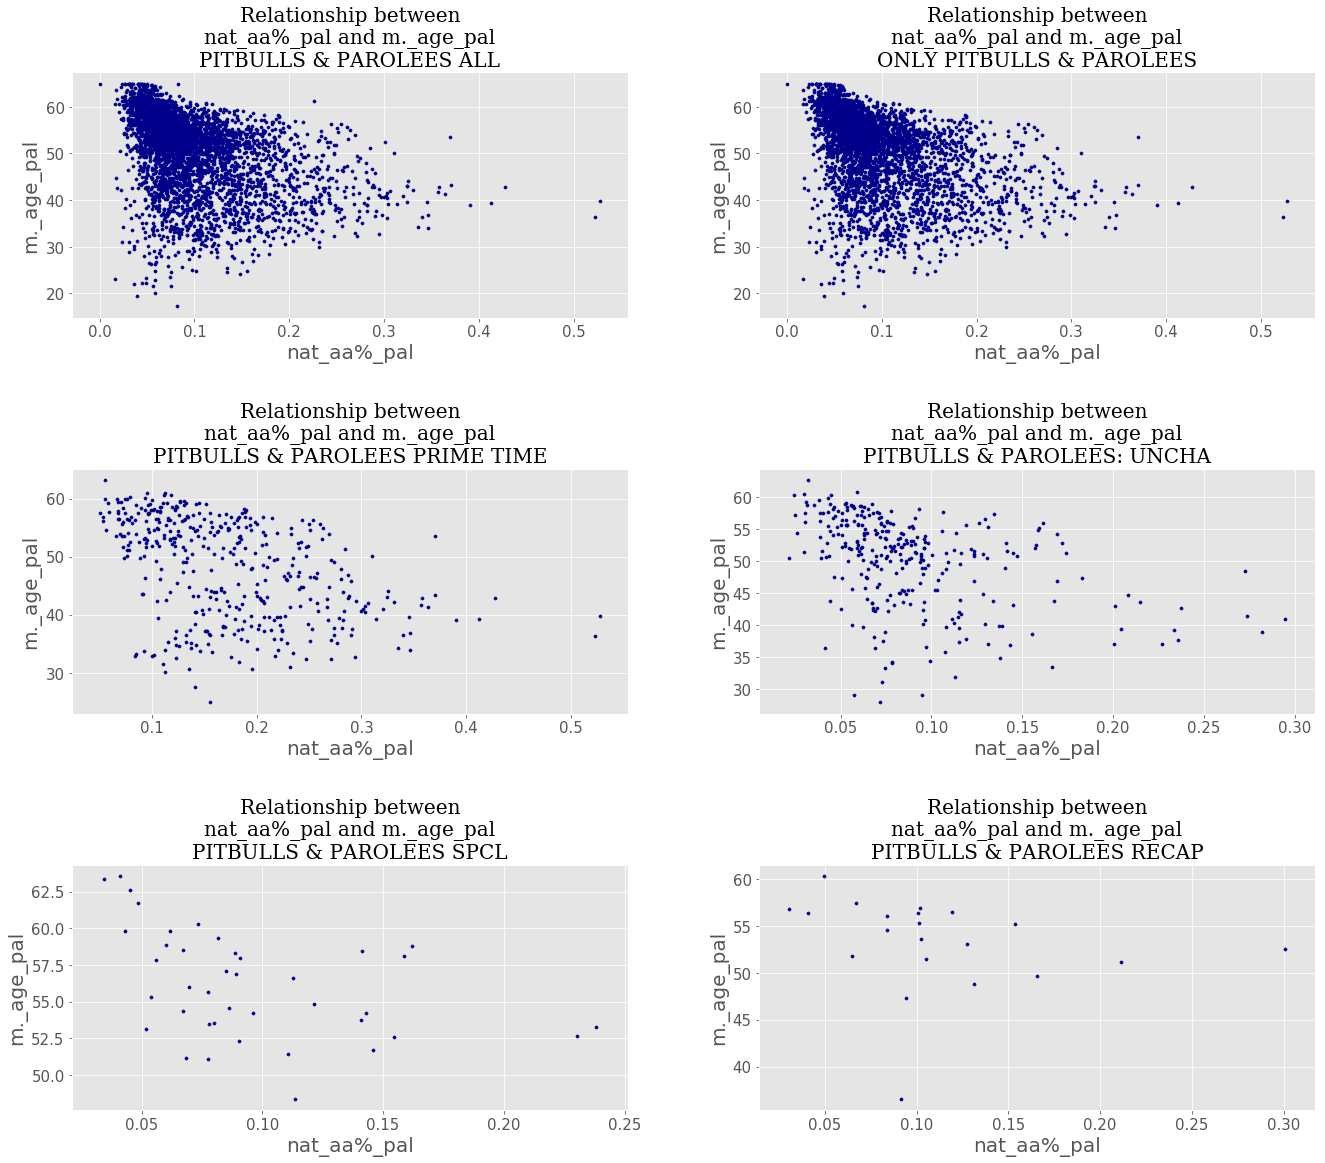

<function __main__.scatter_plot(var1, var2)>

In [571]:
scatter_plot('nat_aa%_pal','m._age_pal')

PITBULLS & PAROLEES ALL

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.361
m._age_pal        -0.361       1.000

ONLY PITBULLS & PAROLEES

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.370
m._age_pal        -0.370       1.000

PITBULLS & PAROLEES PRIME TIME

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.326
m._age_pal        -0.326       1.000

PITBULLS & PAROLEES: UNCHA

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.397
m._age_pal        -0.397       1.000

PITBULLS & PAROLEES SPCL

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.403
m._age_pal        -0.403       1.000

PITBULLS & PAROLEES RECAP

             cvg_aa%_pal  m._age_pal
cvg_aa%_pal        1.000      -0.201
m._age_pal        -0.201       1.000



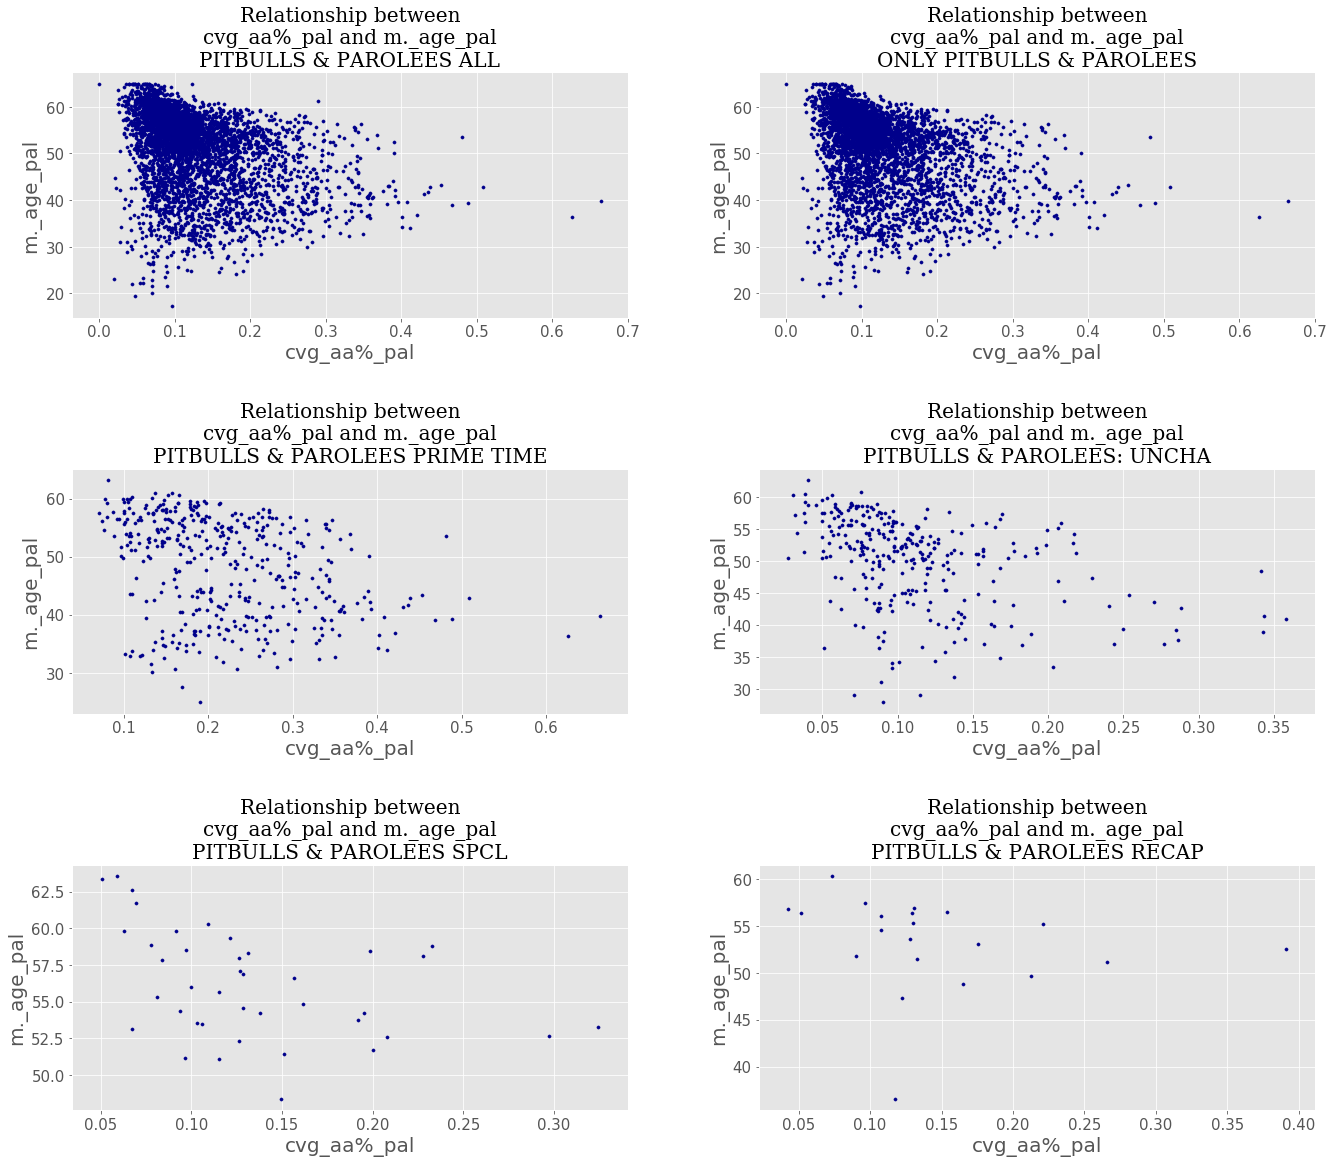

<function __main__.scatter_plot(var1, var2)>

In [570]:
scatter_plot('cvg_aa%_pal','m._age_pal')

### Relationship between Commercial time and Weighted Median Age (L1)

PITBULLS & PAROLEES ALL

               program_ratio  m._age_pal
program_ratio          1.000      -0.293
m._age_pal            -0.293       1.000

ONLY PITBULLS & PAROLEES

               program_ratio  m._age_pal
program_ratio          1.000      -0.303
m._age_pal            -0.303       1.000

PITBULLS & PAROLEES PRIME TIME

               program_ratio  m._age_pal
program_ratio          1.000      -0.619
m._age_pal            -0.619       1.000

PITBULLS & PAROLEES: UNCHA

               program_ratio  m._age_pal
program_ratio          1.000      -0.015
m._age_pal            -0.015       1.000

PITBULLS & PAROLEES SPCL

               program_ratio  m._age_pal
program_ratio          1.000      -0.248
m._age_pal            -0.248       1.000

PITBULLS & PAROLEES RECAP

               program_ratio  m._age_pal
program_ratio          1.000       0.153
m._age_pal             0.153       1.000



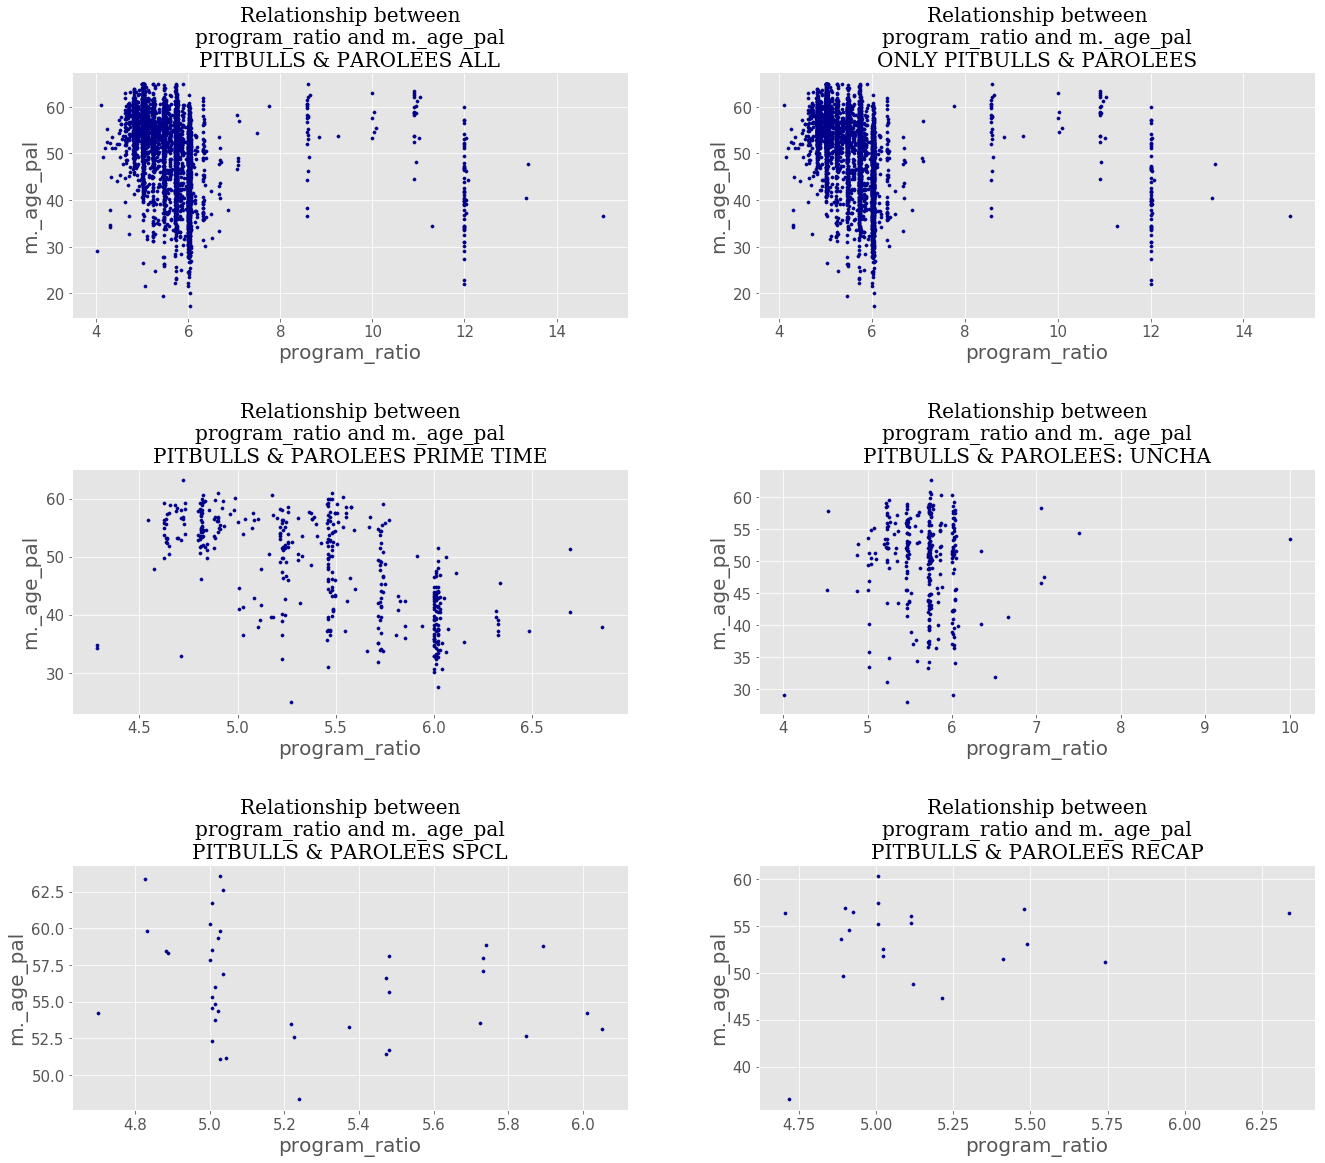

<function __main__.scatter_plot(var1, var2)>

In [564]:
scatter_plot('program_ratio','m._age_pal')

### Relationship between Program to Commercial Ratio and Weighted Median Age (for L1)

PITBULLS & PAROLEES ALL

                     commercial_time_pal  m._age_pal
commercial_time_pal                1.000       0.336
m._age_pal                         0.336       1.000

ONLY PITBULLS & PAROLEES

                     commercial_time_pal  m._age_pal
commercial_time_pal                1.000       0.411
m._age_pal                         0.411       1.000

PITBULLS & PAROLEES PRIME TIME

                     commercial_time_pal  m._age_pal
commercial_time_pal                1.000       0.542
m._age_pal                         0.542       1.000

PITBULLS & PAROLEES: UNCHA

                     commercial_time_pal  m._age_pal
commercial_time_pal                1.000       0.004
m._age_pal                         0.004       1.000

PITBULLS & PAROLEES SPCL

                     commercial_time_pal  m._age_pal
commercial_time_pal                1.000       0.304
m._age_pal                         0.304       1.000

PITBULLS & PAROLEES RECAP

                     commercial_time

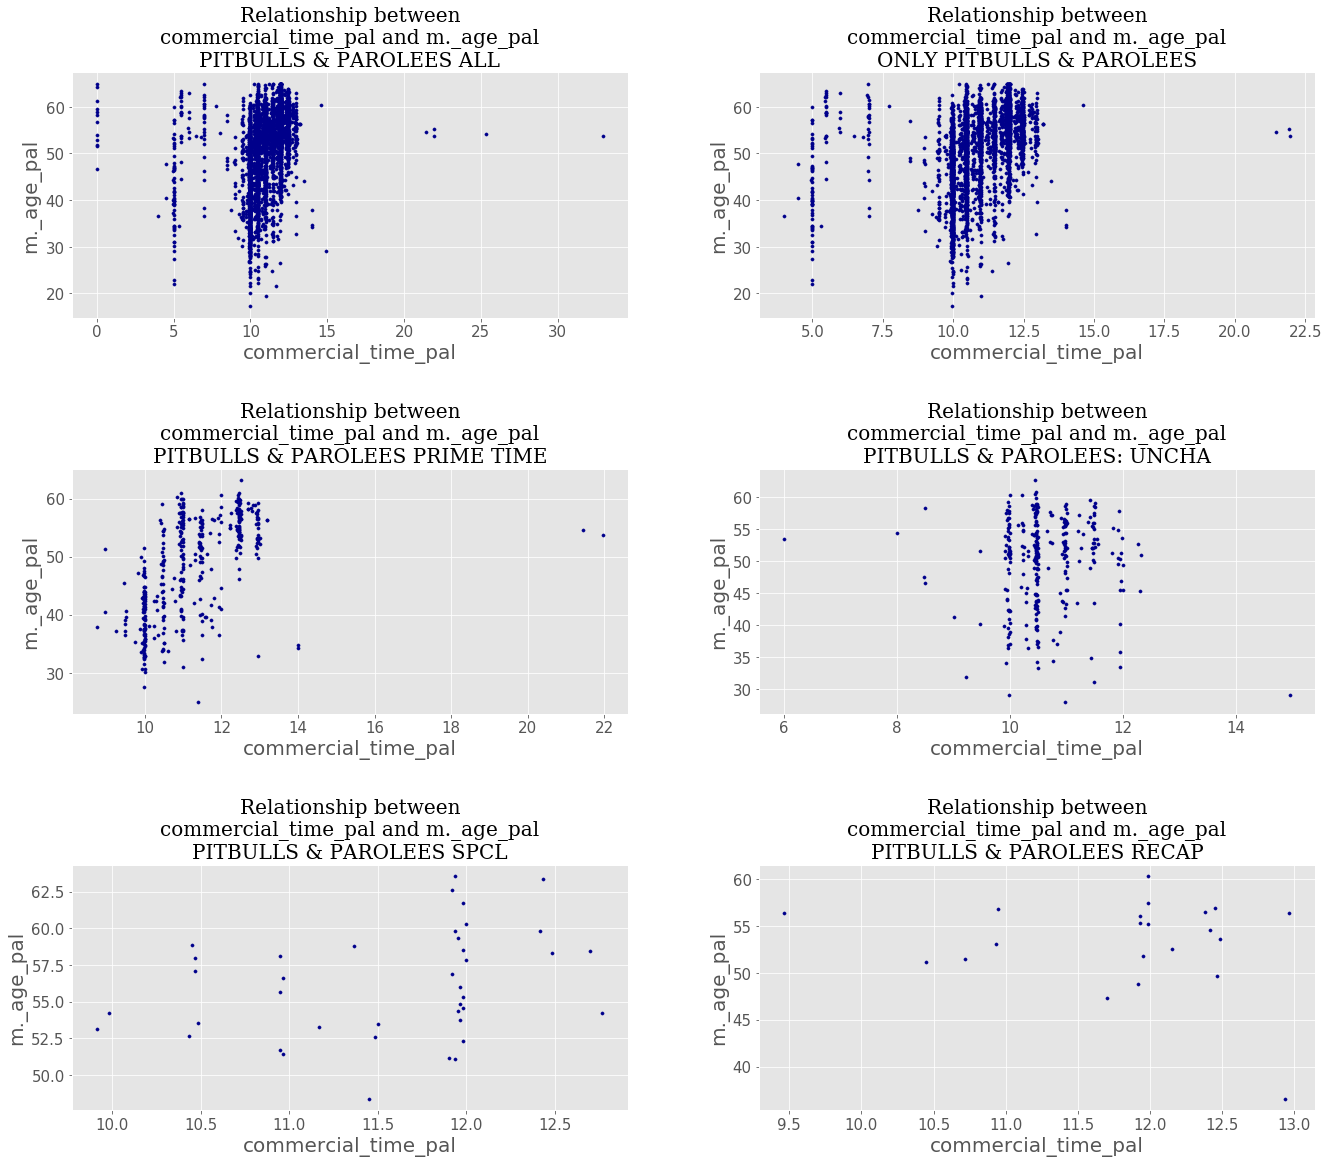

<function __main__.scatter_plot(var1, var2)>

In [563]:
scatter_plot('commercial_time_pal','m._age_pal')

### Relationship between Gender ratio (F/M) and Weighted Median Age (for L3)

PITBULLS & PAROLEES ALL

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.231
m._age_l3d                   0.231       1.000

ONLY PITBULLS & PAROLEES

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.242
m._age_l3d                   0.242       1.000

PITBULLS & PAROLEES PRIME TIME

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.457
m._age_l3d                   0.457       1.000

PITBULLS & PAROLEES: UNCHA

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.132
m._age_l3d                   0.132       1.000

PITBULLS & PAROLEES SPCL

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.106
m._age_l3d                   0.106       1.000

PITBULLS & PAROLEES RECAP

                  gender_ratio_l3d  m._age_l3d
gender_ratio_l3d             1.000       0.225
m._age_l3d                   0.2

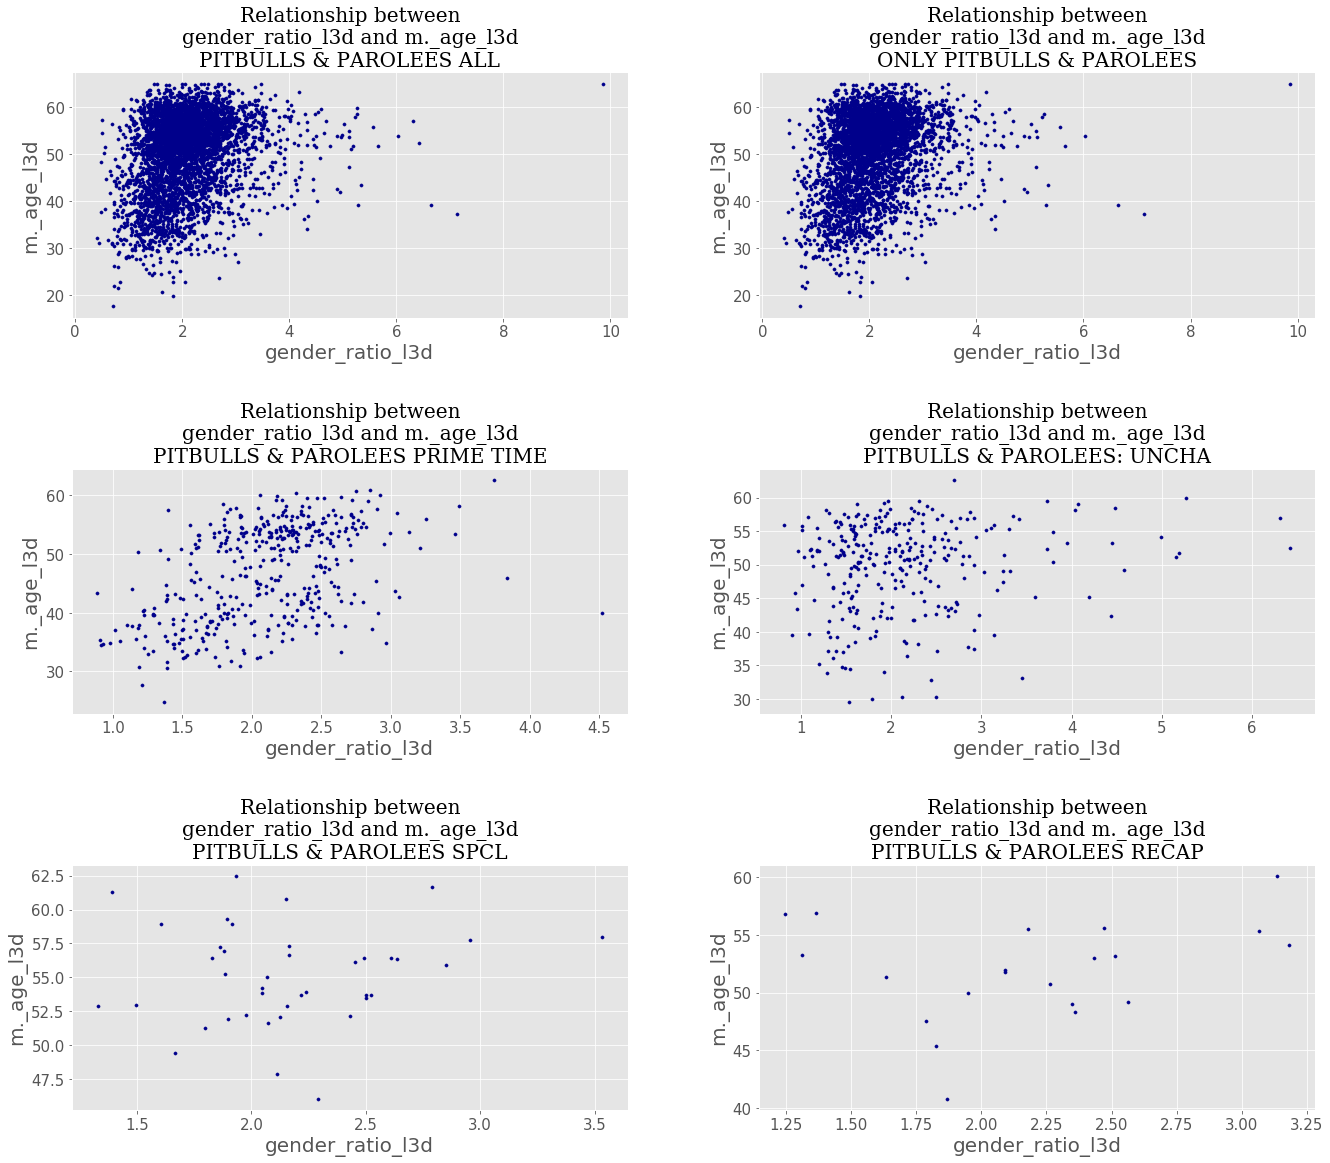

<function __main__.scatter_plot(var1, var2)>

In [500]:
scatter_plot('gender_ratio_l3d','m._age_l3d')

### Relationship between composition index and gender ratio for L3

PITBULLS & PAROLEES ALL

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000    -0.156
comp_l3d                    -0.156     1.000

ONLY PITBULLS & PAROLEES

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000    -0.161
comp_l3d                    -0.161     1.000

PITBULLS & PAROLEES PRIME TIME

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000    -0.363
comp_l3d                    -0.363     1.000

PITBULLS & PAROLEES: UNCHA

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000    -0.091
comp_l3d                    -0.091     1.000

PITBULLS & PAROLEES SPCL

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000     0.074
comp_l3d                     0.074     1.000

PITBULLS & PAROLEES RECAP

                  gender_ratio_l3d  comp_l3d
gender_ratio_l3d             1.000    -0.341
comp_l3d                    -0.341     1.000



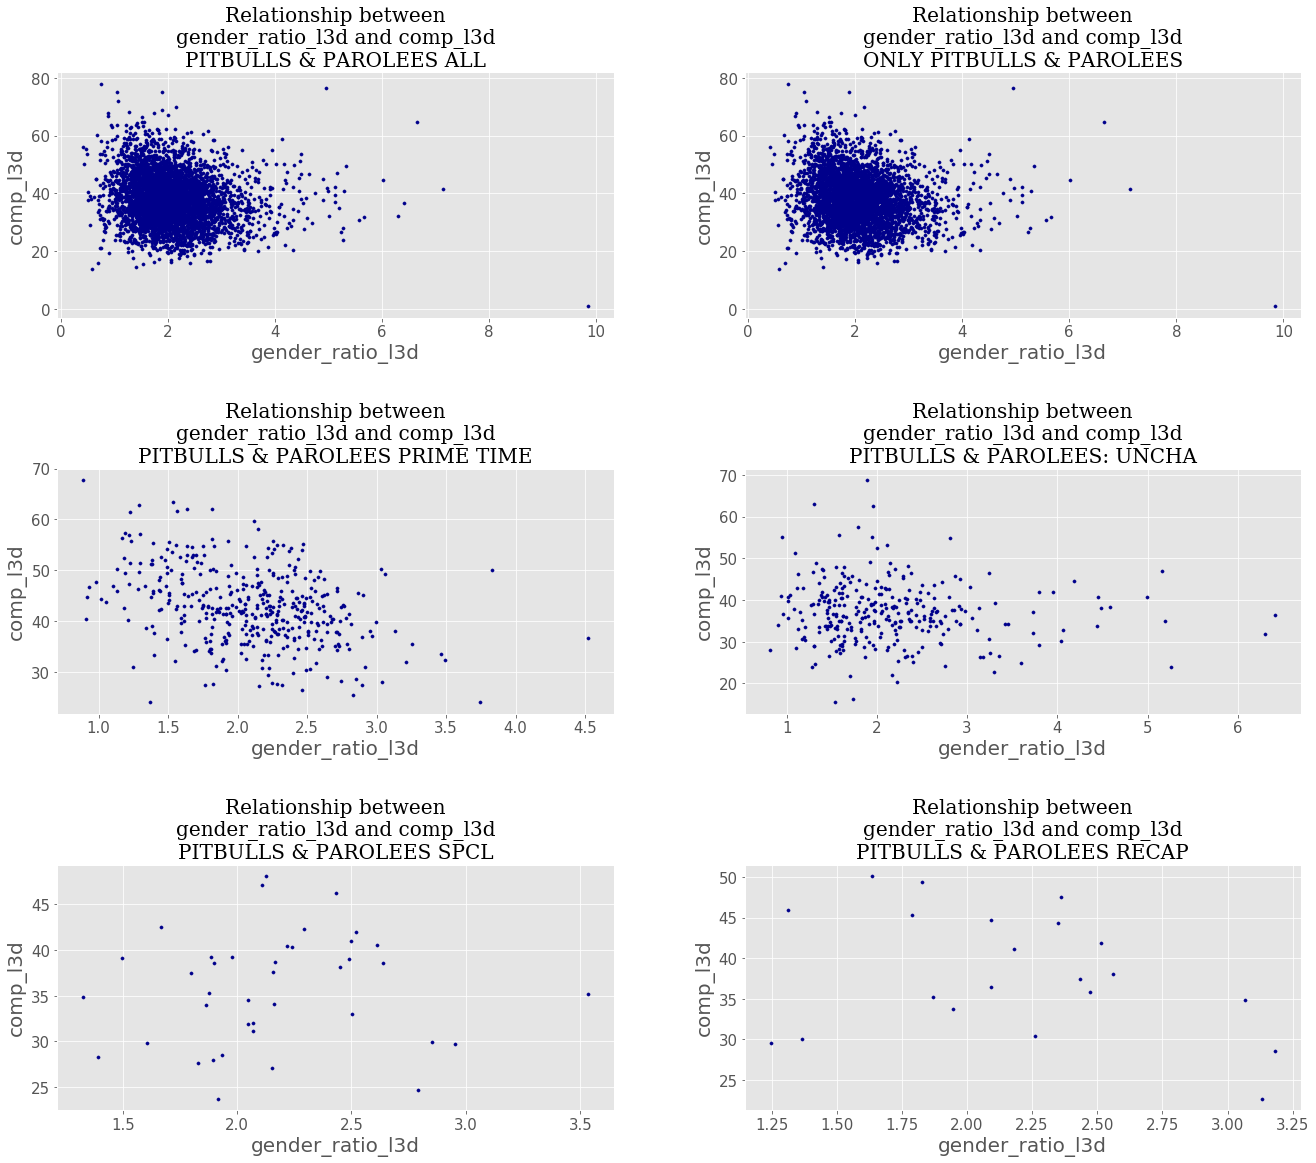

<function __main__.scatter_plot(var1, var2)>

In [501]:
scatter_plot('gender_ratio_l3d','comp_l3d')

Composition index increases as commercial time increases. People of age 25-54 are less likely to watch long commercials!

In [591]:
def bar_chart_by_day(rating, ylim=[0,.5]):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES PRIME TIME','PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES SPCL','PITBULLS & PAROLEES RECAP']

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
    plt.tight_layout(h_pad=10,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        df_ent=dfx.groupby(['day'])[rating].mean().to_frame()
        df_ent.reset_index(inplace=True)
        df_entered=df_ent.sort_values(rating,ascending=False )
        pos = list(range(len(df_entered['day'])))
        if name =='PITBULLS & PAROLEES RECAP':
            days=list(df_entered['day'])
            days.insert(0,' ')
            days.insert(1,' ')
            days.insert(3,' ')
            days.insert(5,' ')
            days.insert(7,' ')
        else:
            days=list(df_entered['day'])
            days.insert(0,' ')
        ax.set_ylim(ylim)
        ax.bar(pos, df_entered[rating],alpha=.7,align="center",color='DarkBlue')
        ax.set_xticklabels(days, size =15,family="serif")
        for i, label in enumerate(list(df_entered.index)):
            score = df_entered.loc[label][1].round(2)
            ax.annotate(str(score), (i, score + 0.01),ha='center', size=15)
        ax.set_title(rating + " by Day of the Week\n"+ name,x=.5, fontsize=20,family='serif')

    plt.show()
    return bar_chart_by_day
    
    
    


In [598]:
def time_series_plot(rating, ylim=[-0.1,.7]):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES ALL','ONLY PITBULLS & PAROLEES','PITBULLS & PAROLEES PRIME TIME','PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES SPCL','PITBULLS & PAROLEES RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=6, figsize=(15,20))
    plt.tight_layout(h_pad=5)
    plt.style.use('ggplot')
    
    for ax,dfx,name in zip(axes.flat,data, names):
        df_entered = dfx.groupby(['date'])[rating].mean().to_frame('mean')
        df_entered.reset_index(inplace=True)
        df_entered['date'] =pd.to_datetime(df_entered.date)
        dfw=df_entered.sort_values(by='date')
        ax.plot(dfw['date'], dfw['mean'], color='DarkBlue')
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.set_ylim(ylim)
        ax.set_title("Time Series of "+rating + " for "+ name,x=.5, fontsize=20,family='serif')
    plt.show()
    return time_series_plot

In [599]:
def bar_chart_by_time(rating, ylim=[0,.5]):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES ALL','ONLY PITBULLS & PAROLEES','PITBULLS & PAROLEES PRIME TIME','PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES SPCL','PITBULLS & PAROLEES RECAP']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
    plt.tight_layout(h_pad=10,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        df_ent=dfx.groupby(['prime_time'])[rating].mean().to_frame()
        df_ent.reset_index(inplace=True)
        df_entered=df_ent.sort_values(rating,ascending=False )
        pos = list(range(len(df_entered['prime_time'])))
        time=list(df_entered['prime_time'])
        if name =='PITBULLS & PAROLEES PRIME TIME' or name =='PITBULLS & PAROLEES RECAP':
            time.insert(0,' ')
            time.insert(2,' ')
            time.insert(4,' ')
            time.insert(6,' ')
        else:
            time.insert(0,' ')
        ax.bar(pos, df_entered[rating],alpha=.7,align="center",color='DarkBlue',width=0.5)
        ax.set_xticklabels(time, size=15)
        for i, label in enumerate(list(df_entered.index)):
            score = df_entered.loc[label][1].round(2)
            ax.annotate(str(score), (i, score + 0.01),ha='center', size=15)
        ax.set_title(rating +" by Time for\n"+ name,x=.5, fontsize=20,family='serif')
        ax.set_ylim(ylim)
    plt.show()
    return bar_chart_by_time




NATIONAL RATING L1 BY DAY OF THE WEEK



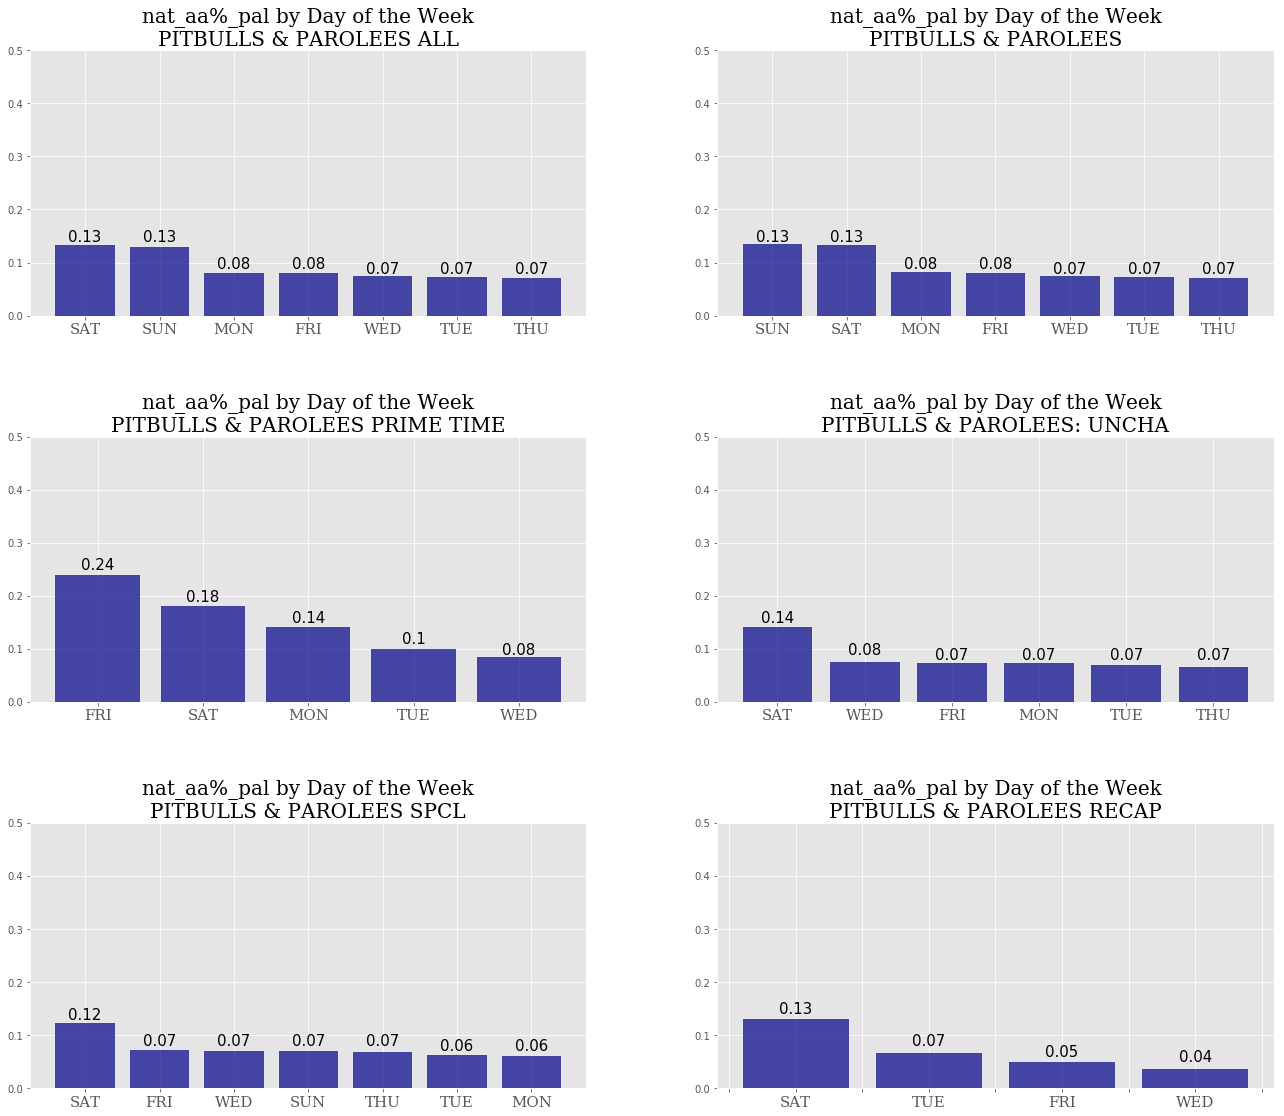

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR NATIONAL RATING L1



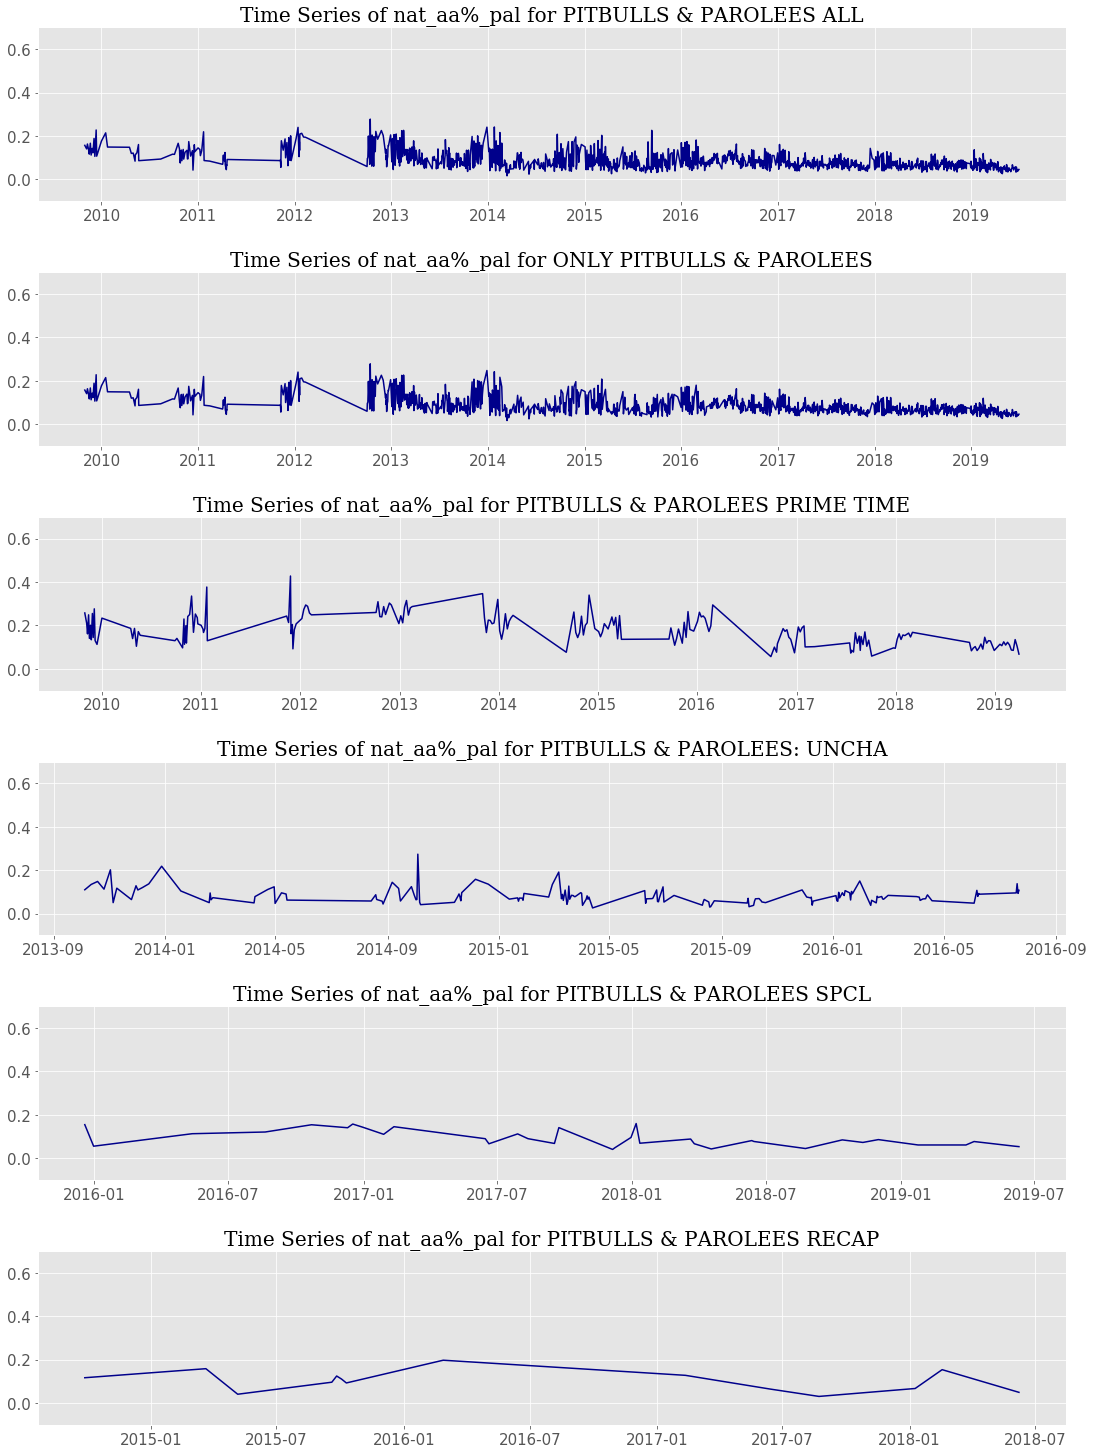

<function time_series_plot at 0x1a19814048>



NATIONAL RATING L1 BY PRIME TIME


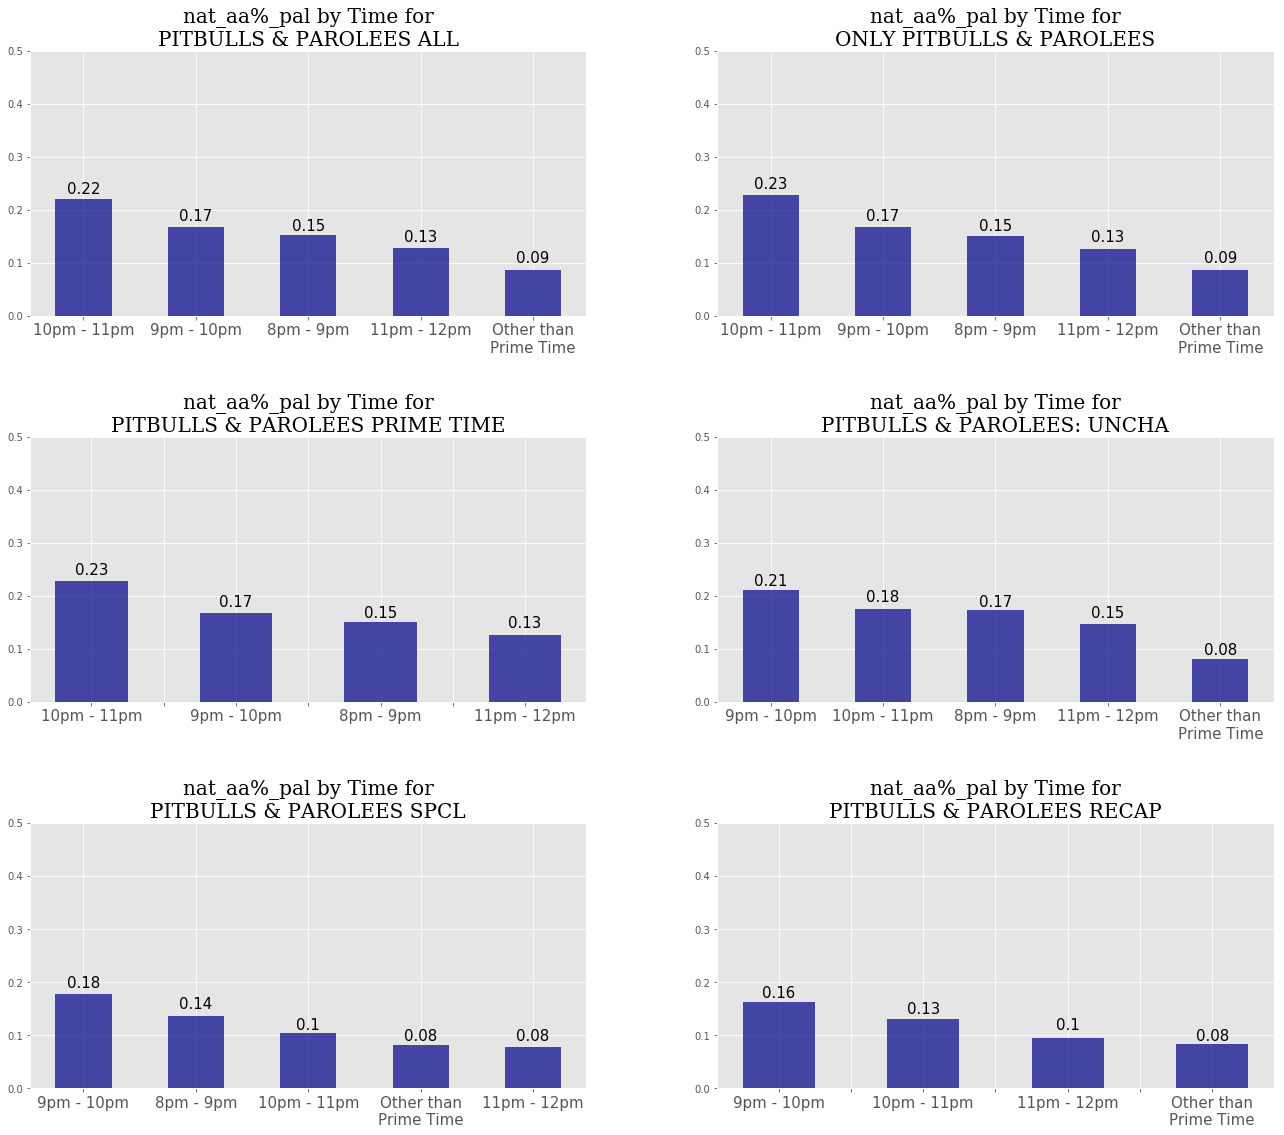

<function bar_chart_by_time at 0x1a19814268>




COVERAGE RATING L1 BY DAY OF THE WEEK



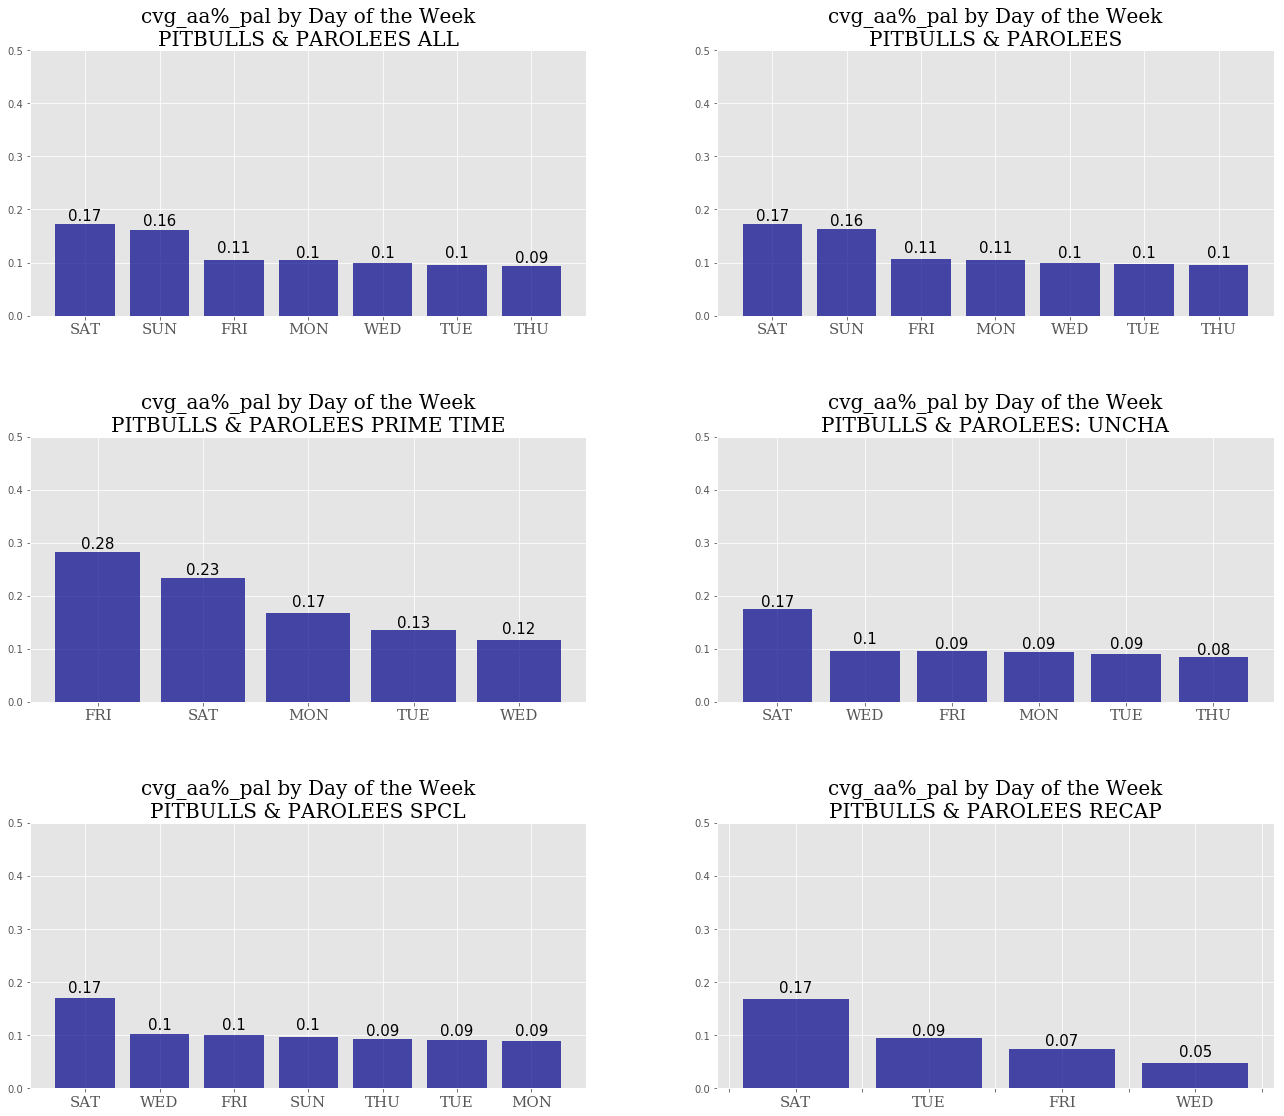

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR COVERAGE RATING L1



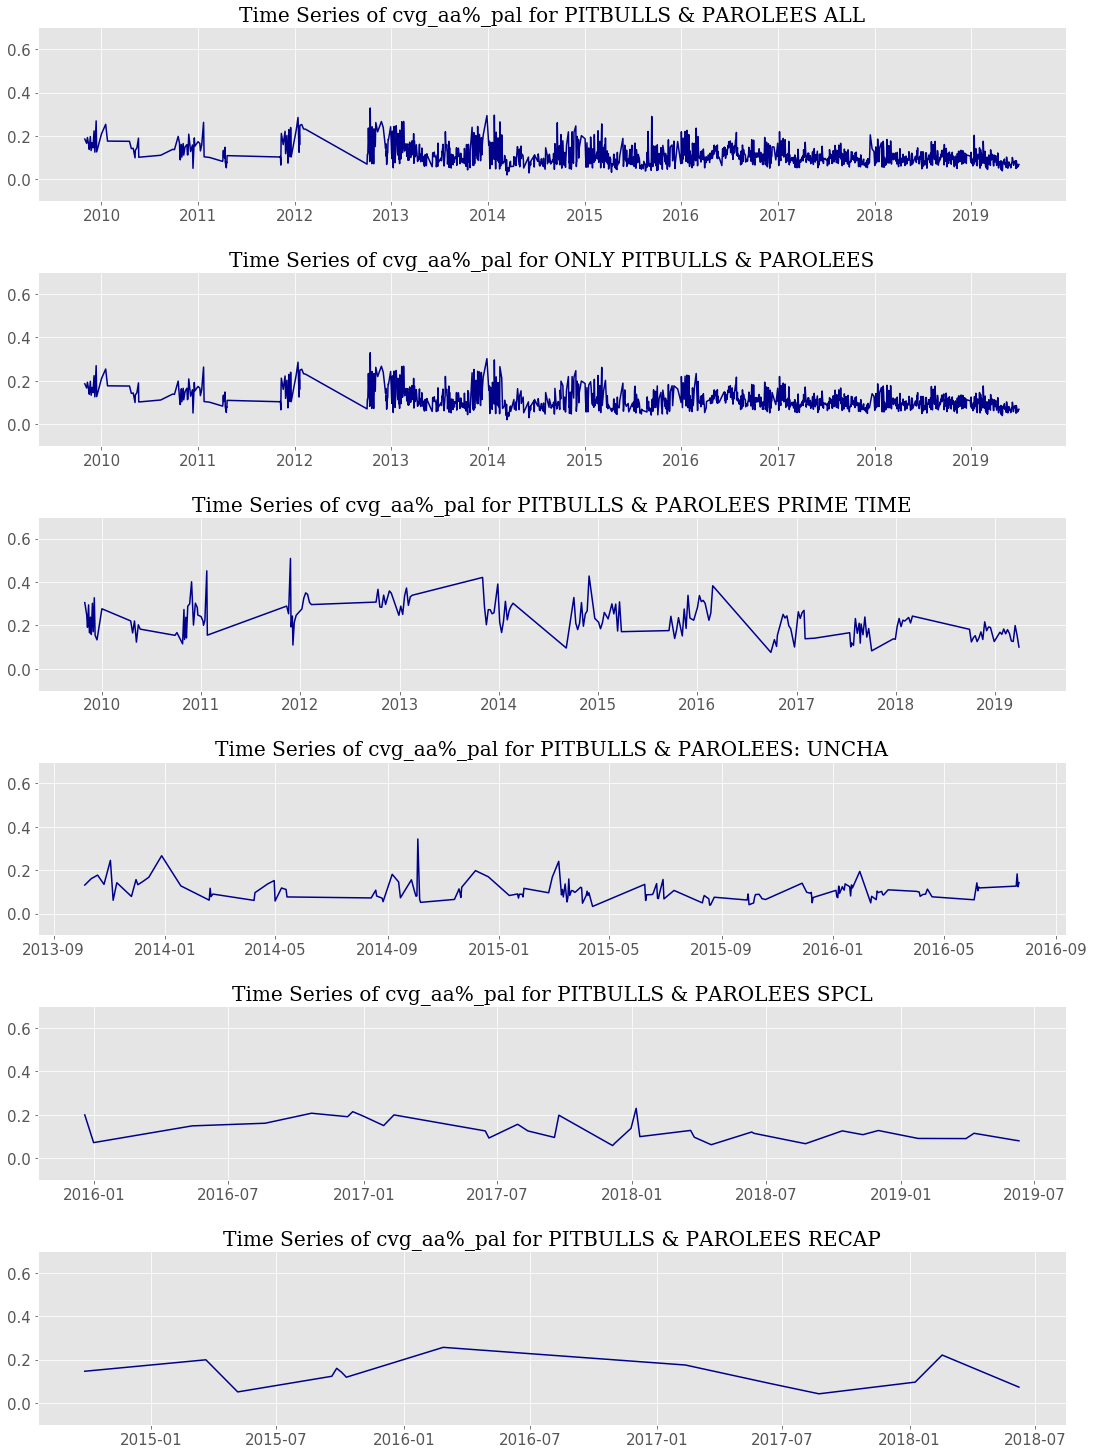

<function time_series_plot at 0x1a19814048>



COVERAGE RATING L1 BY PRIME TIME


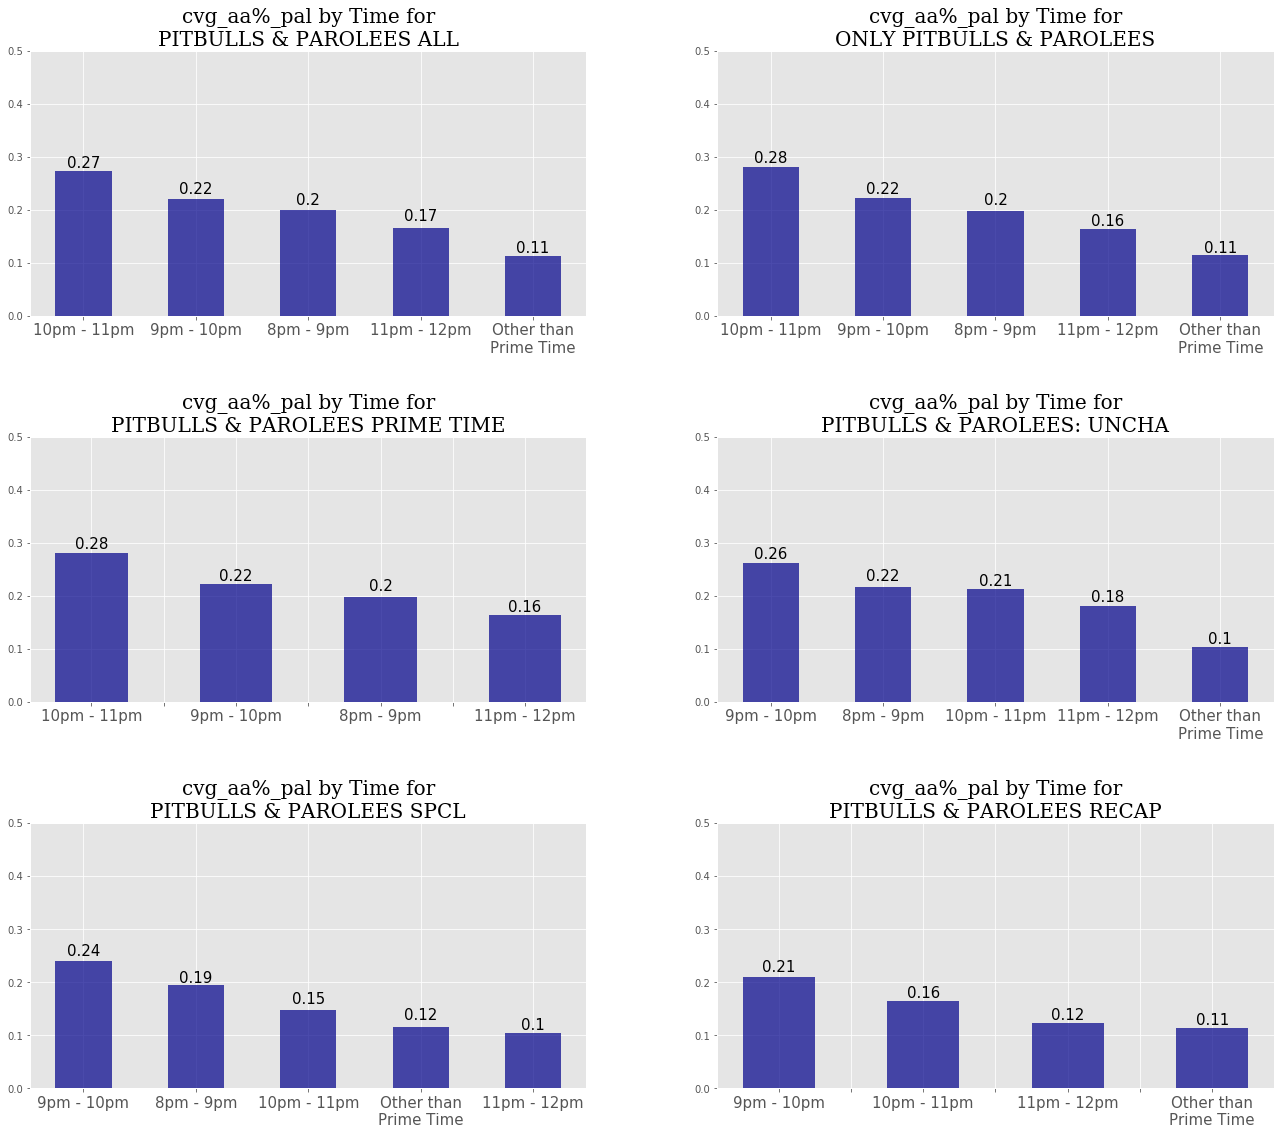

<function bar_chart_by_time at 0x1a19814268>




NATIONAL RATING L1+ BY DAY OF THE WEEK



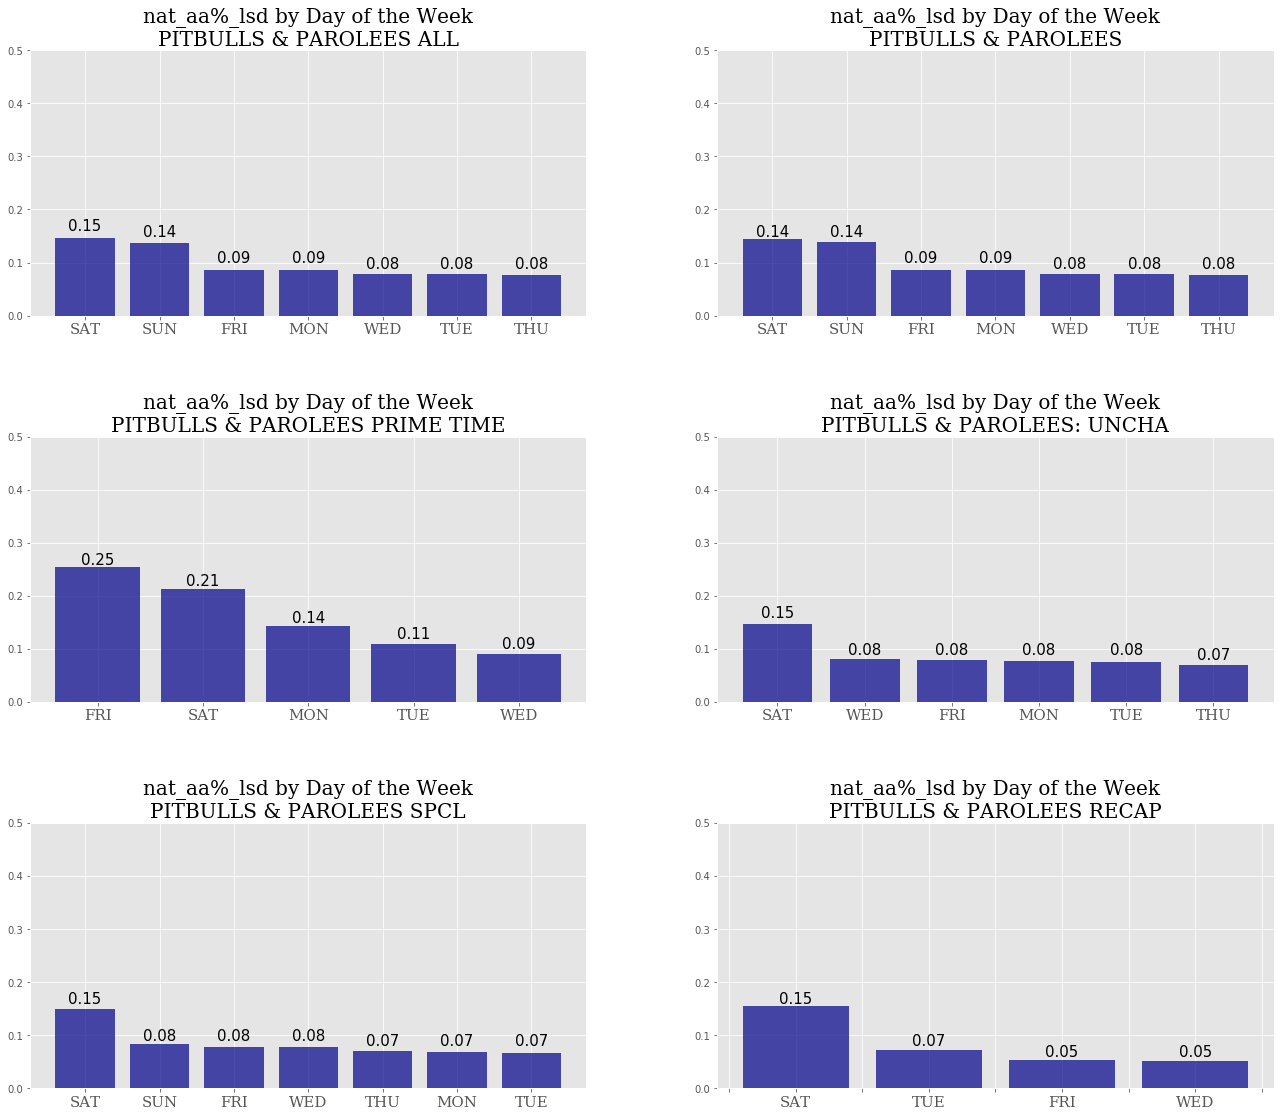

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR NATIONAL RATING L1+



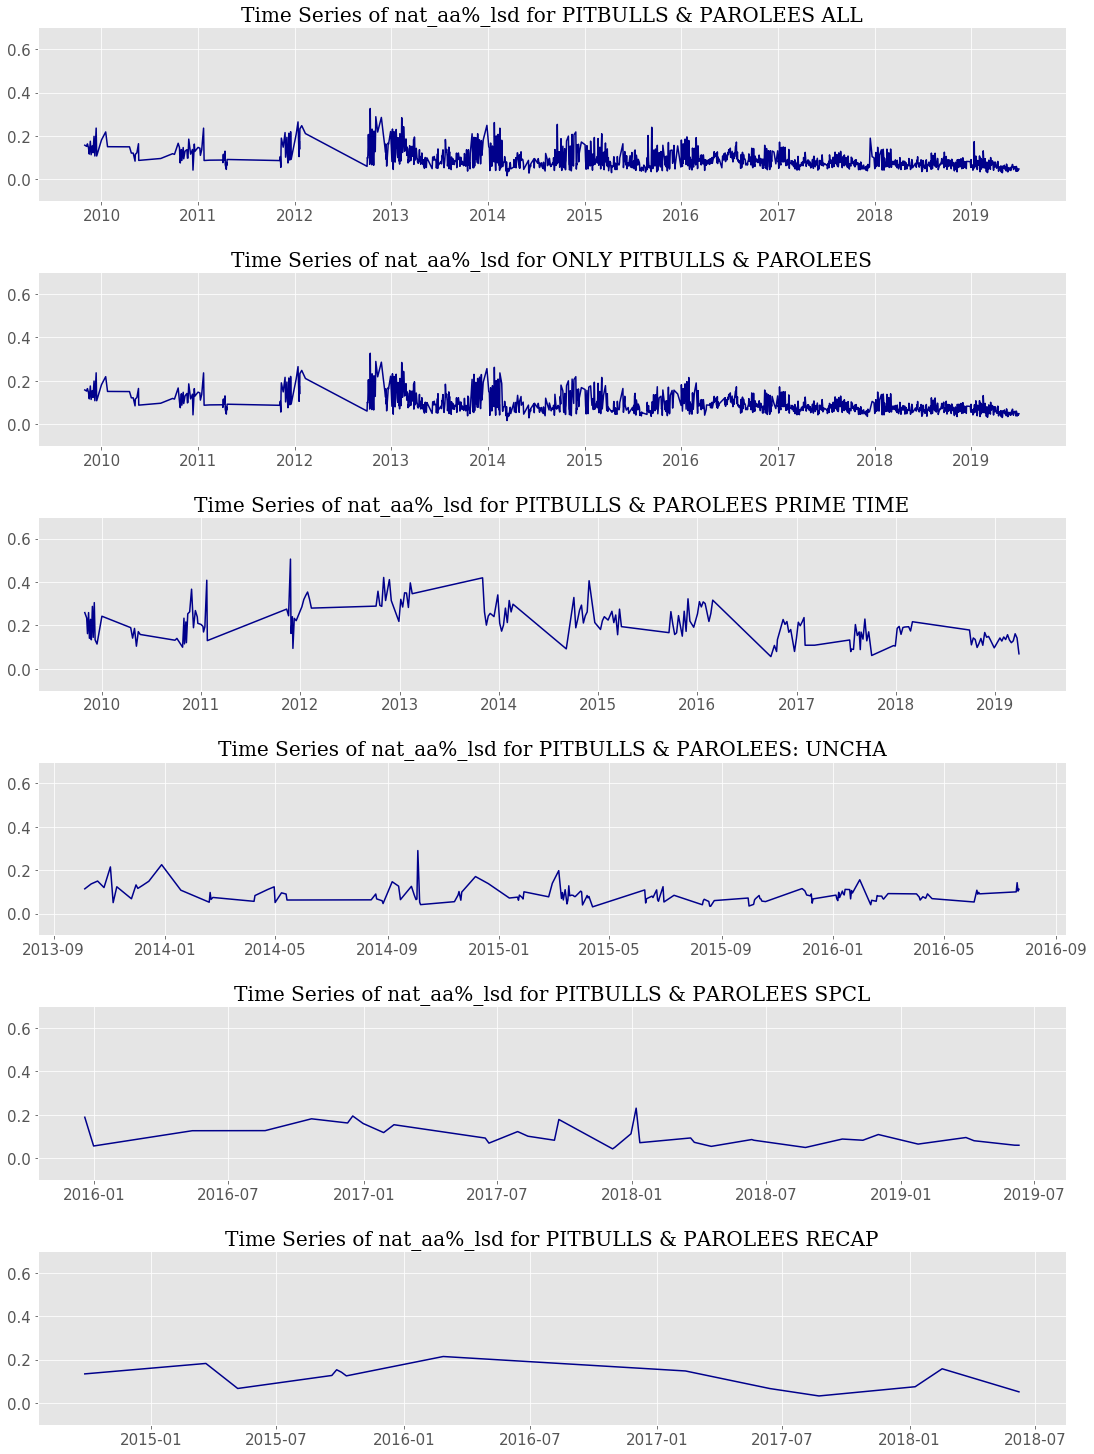

<function time_series_plot at 0x1a19814048>



NATIONAL RATING L1+ BY PRIME TIME


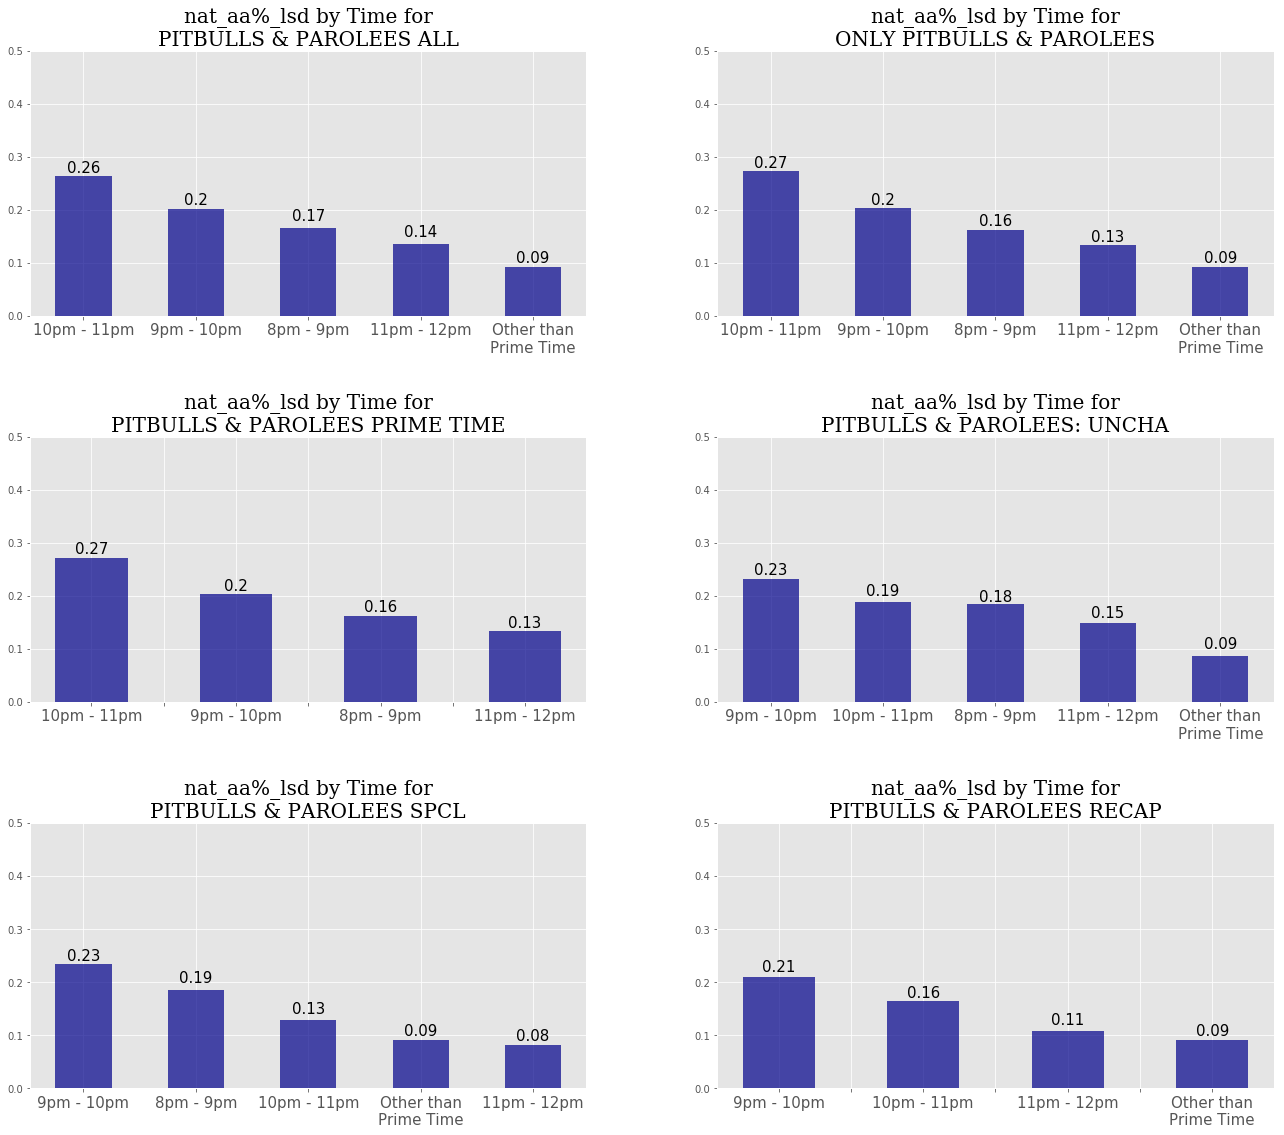

<function bar_chart_by_time at 0x1a19814268>




COVERAGE RATING L1+ BY DAY OF THE WEEK



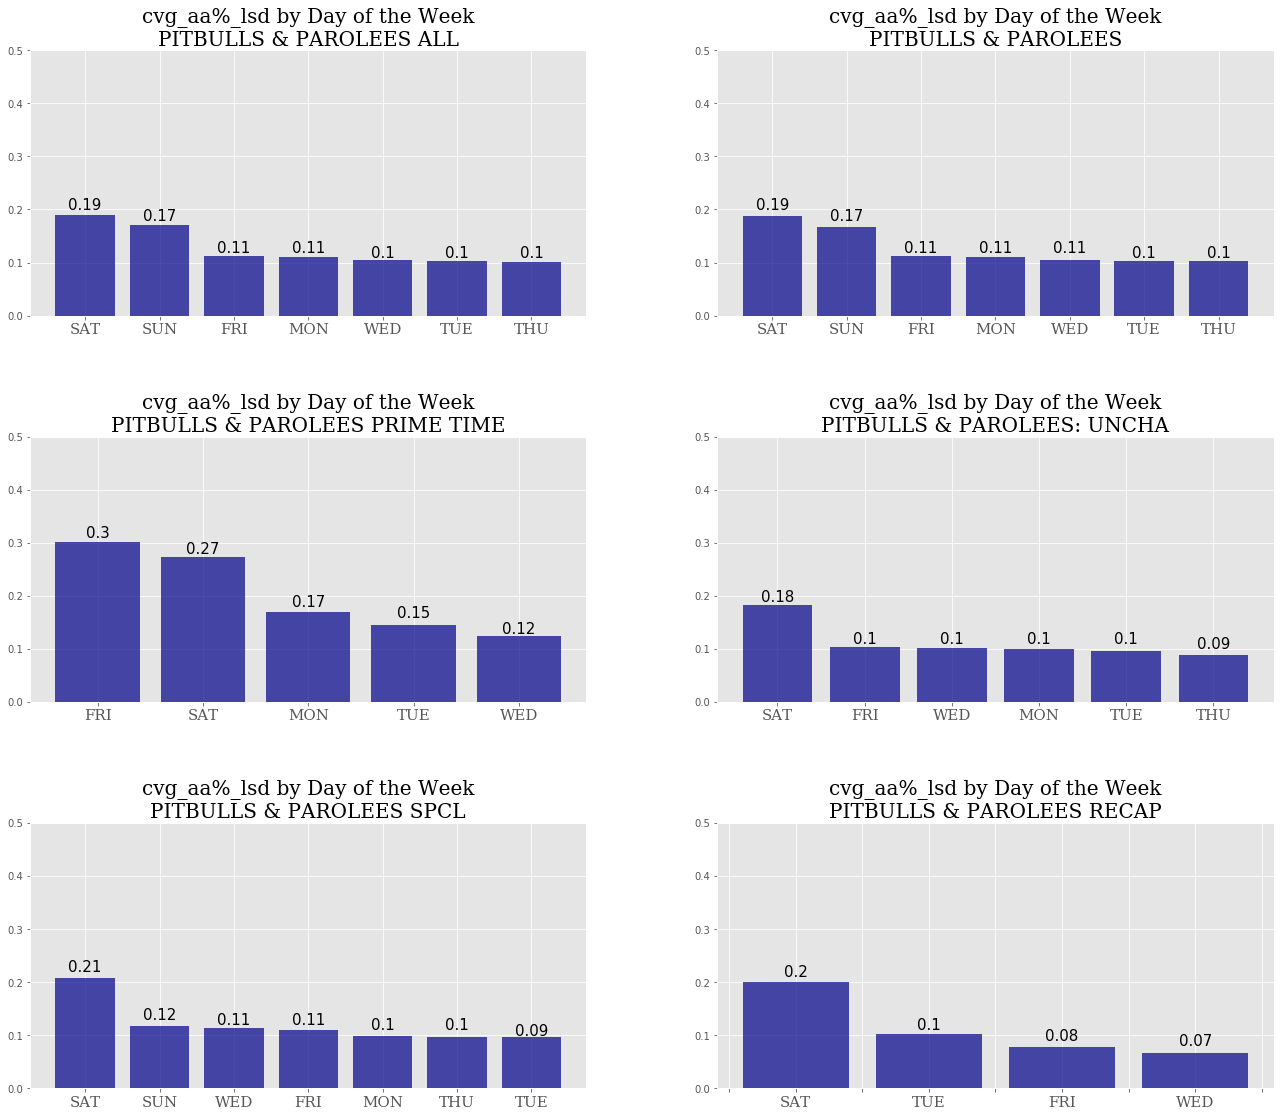

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR COVERAGE RATING L1+



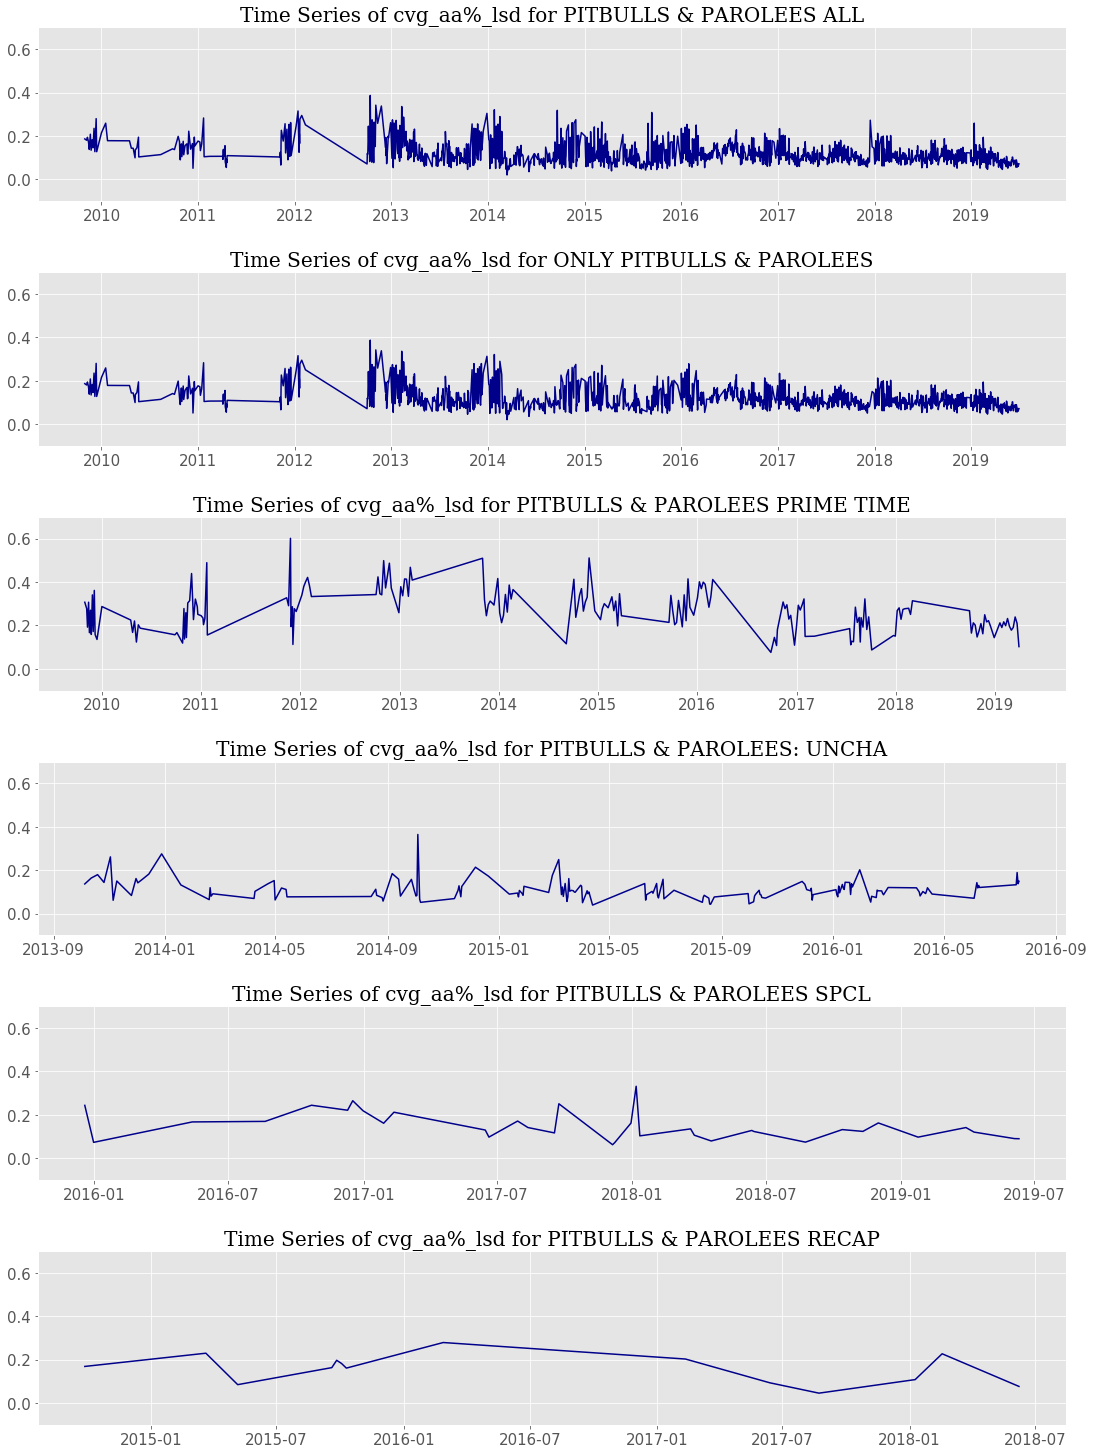

<function time_series_plot at 0x1a19814048>



COVERAGE RATING L1+ BY PRIME TIME


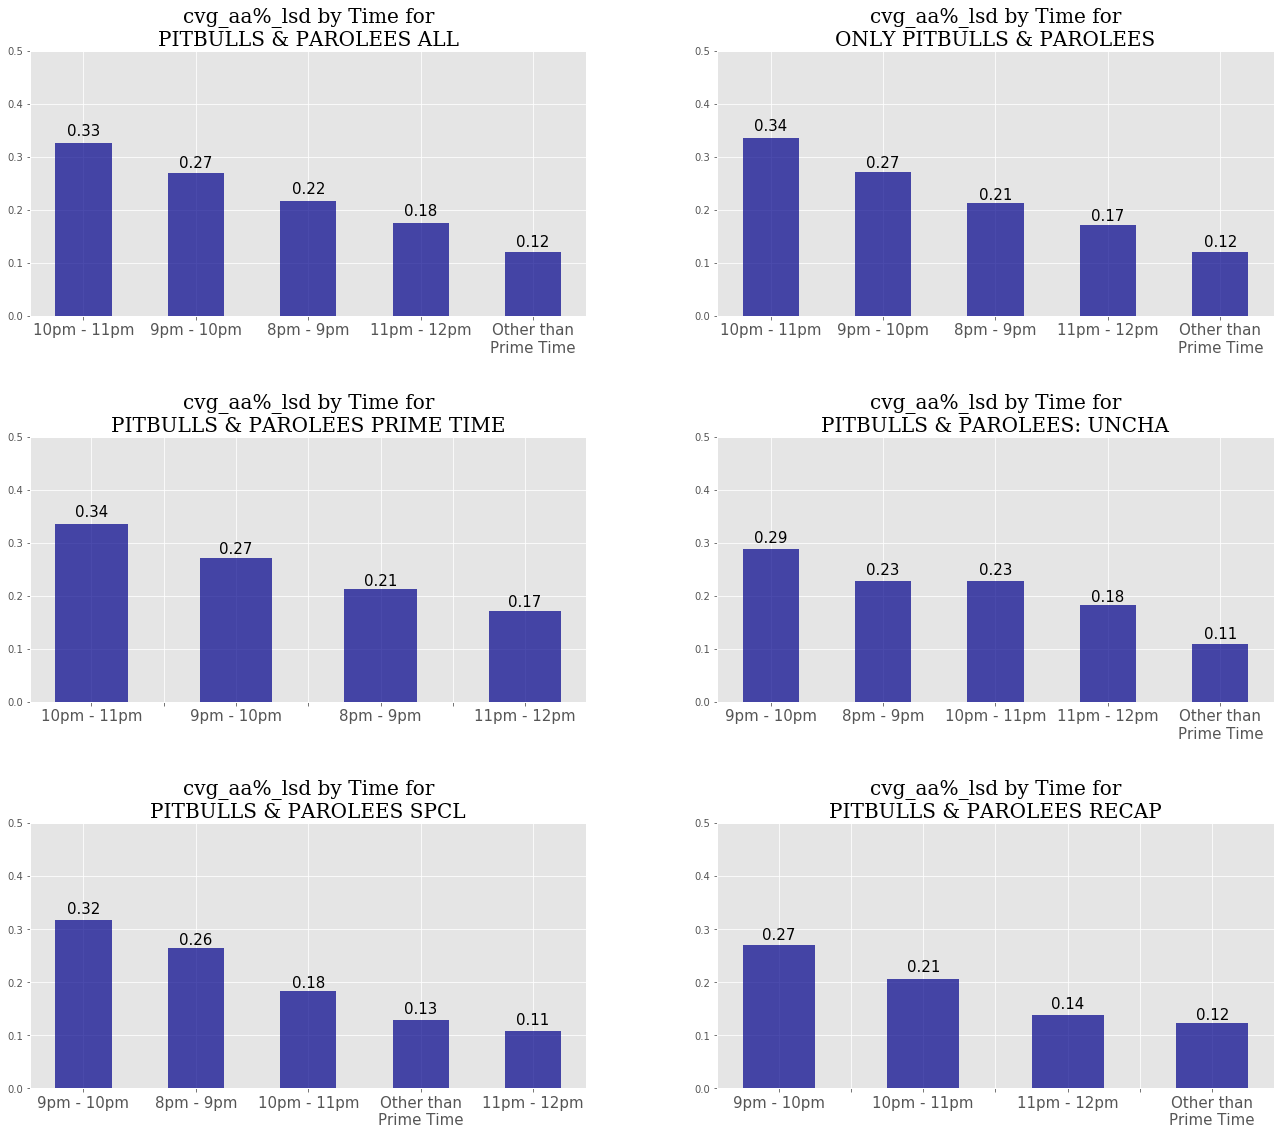

<function bar_chart_by_time at 0x1a19814268>




NATIONAL RATING L3+ BY DAY OF THE WEEK



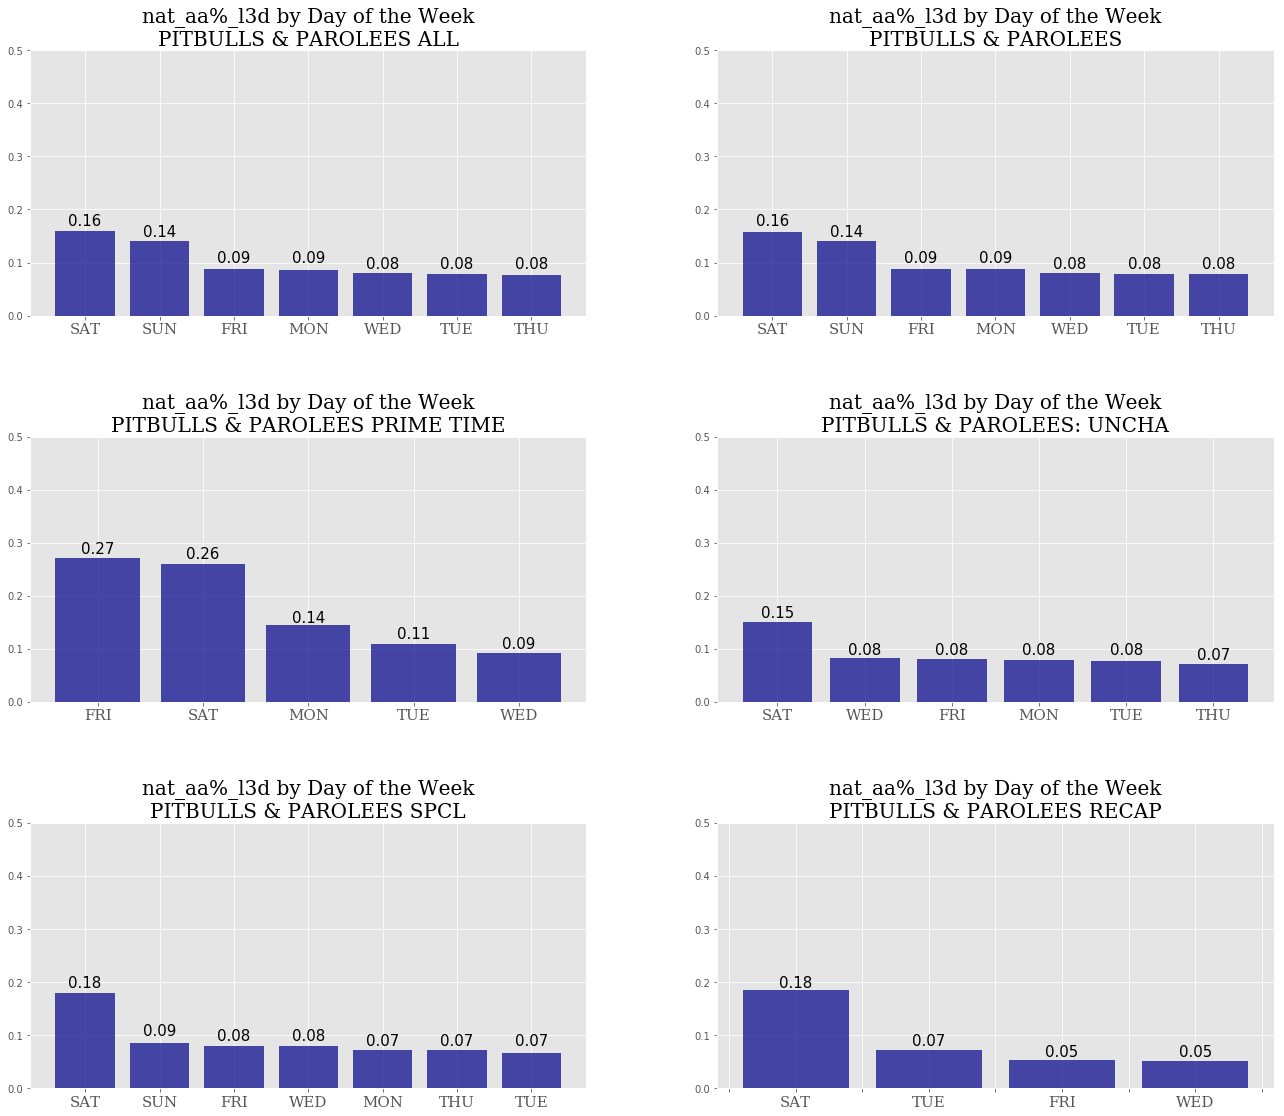

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR NATIONAL RATING L3+



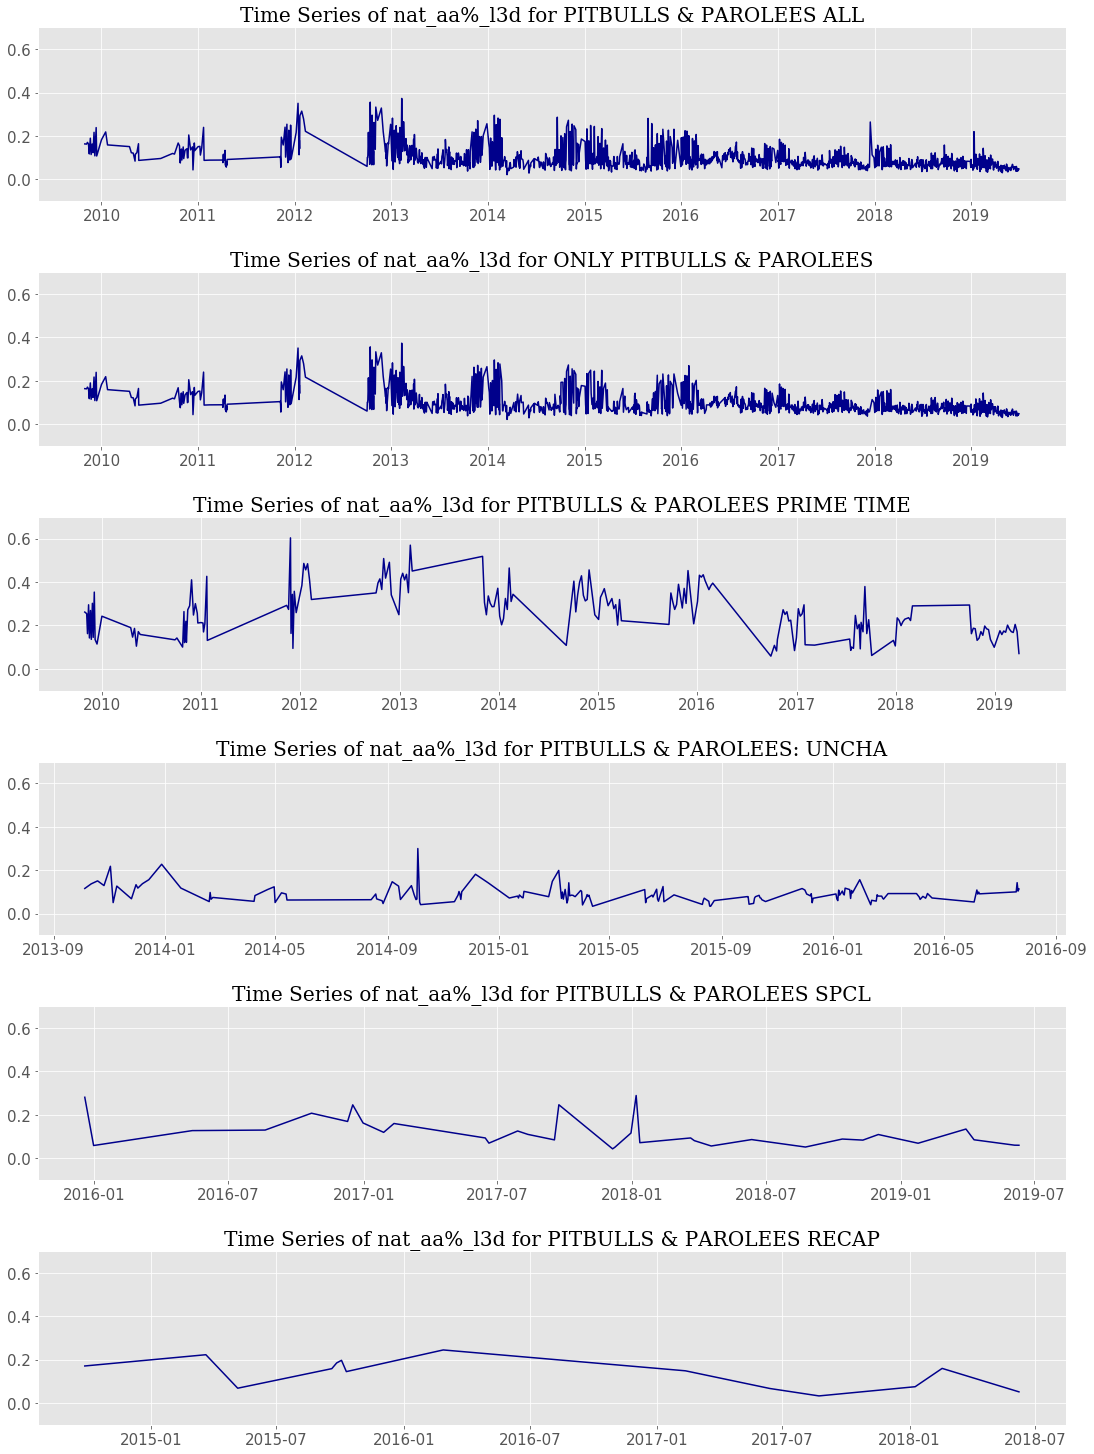

<function time_series_plot at 0x1a19814048>



NATIONAL RATING L3+ BY PRIME TIME


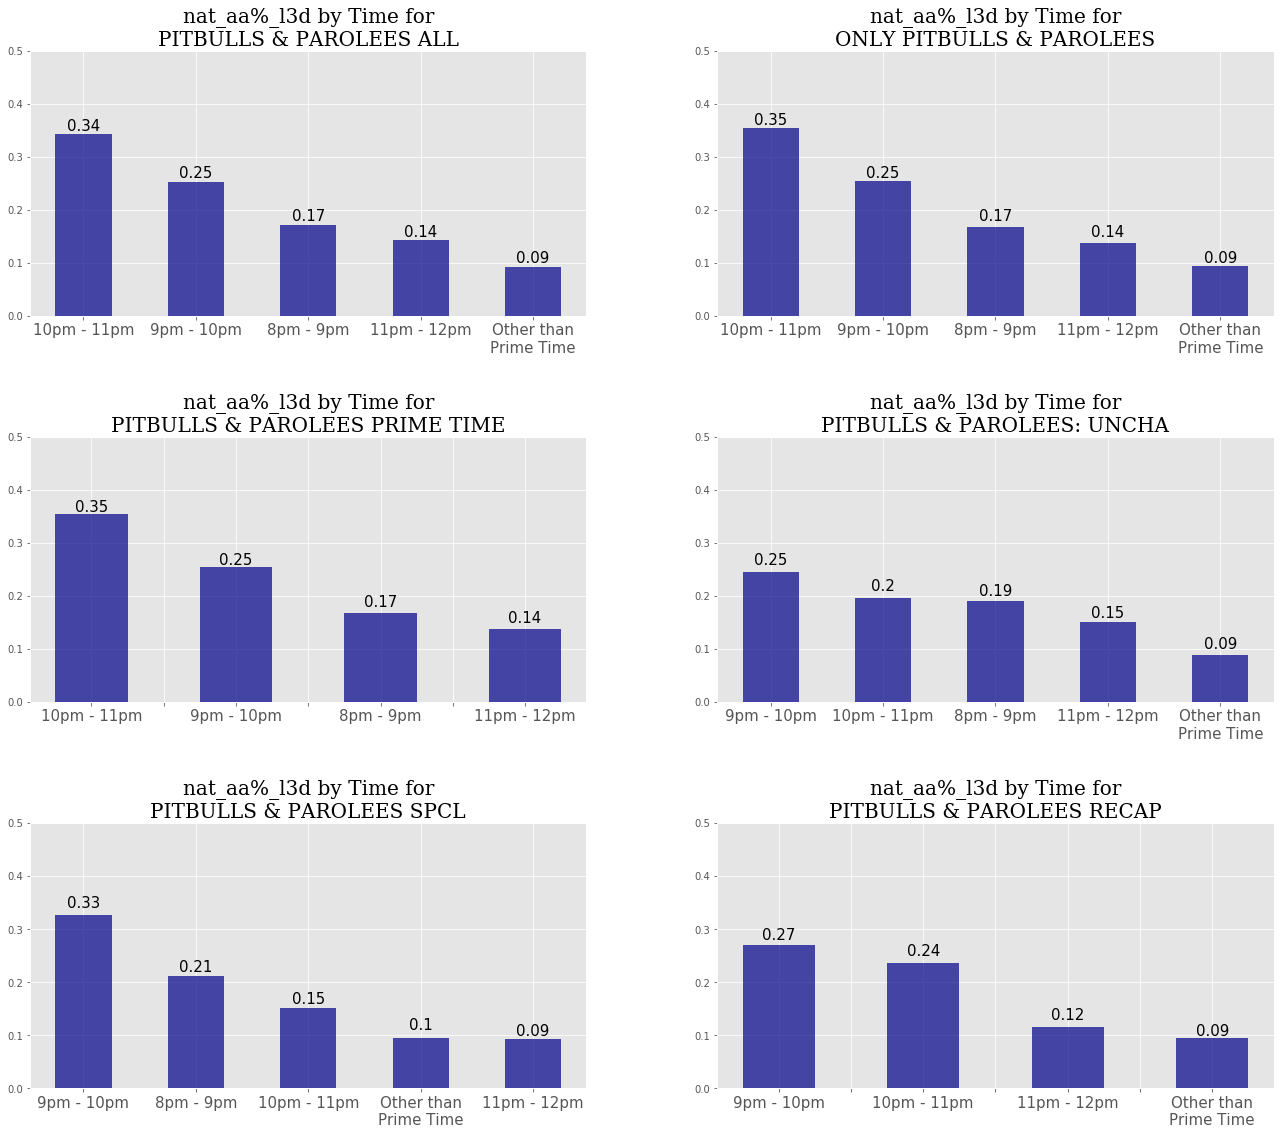

<function bar_chart_by_time at 0x1a19814268>




COVERAGE RATING L3+ BY DAY OF THE WEEK



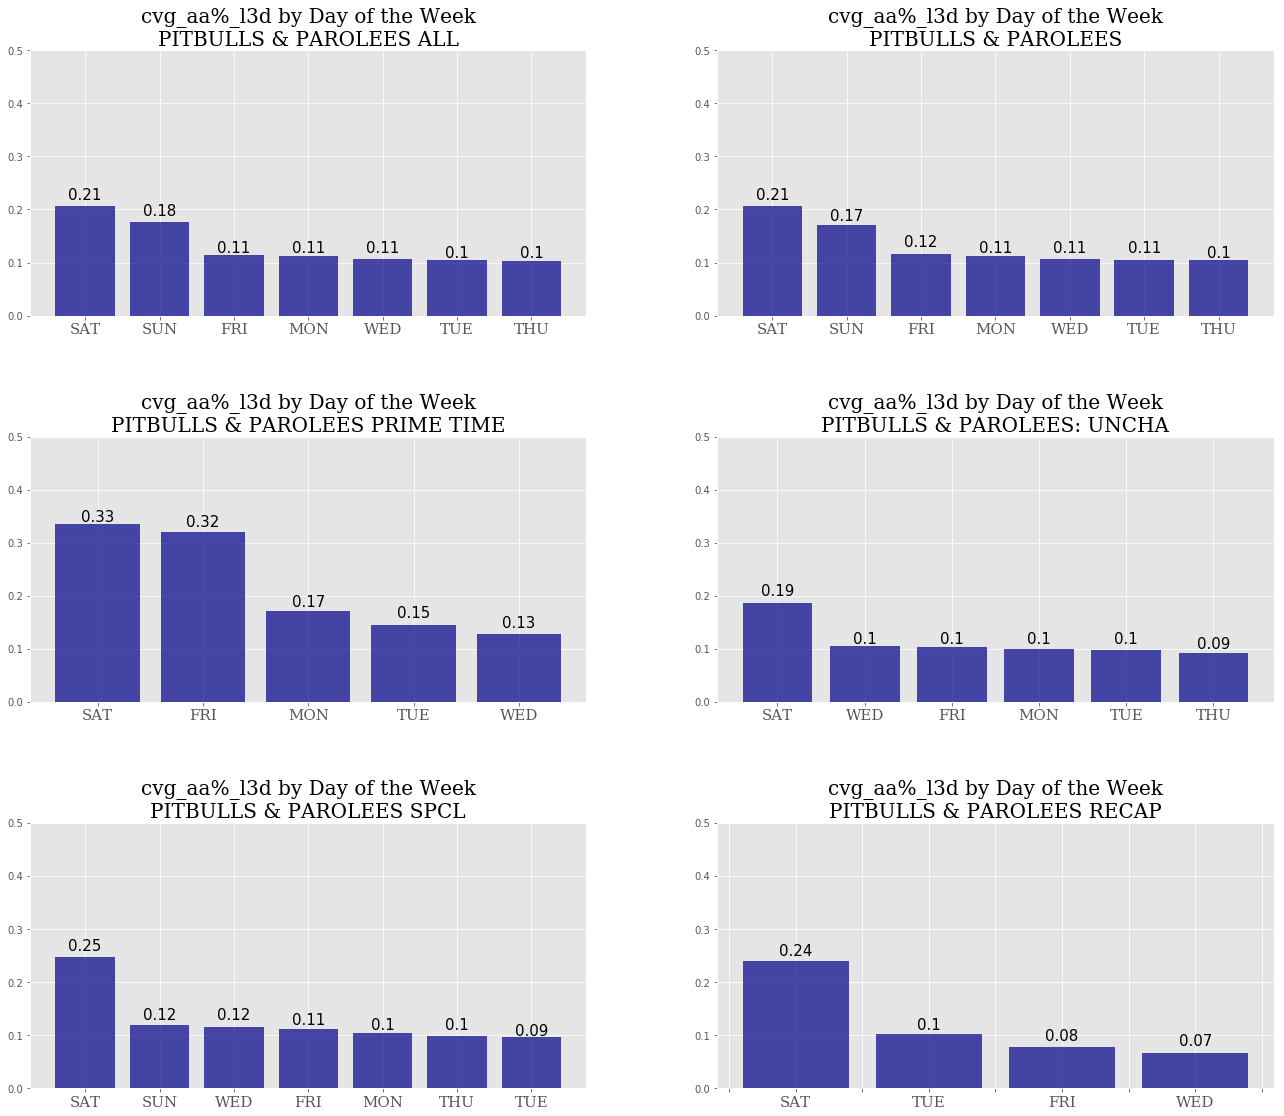

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR COVERAGE RATING L3+



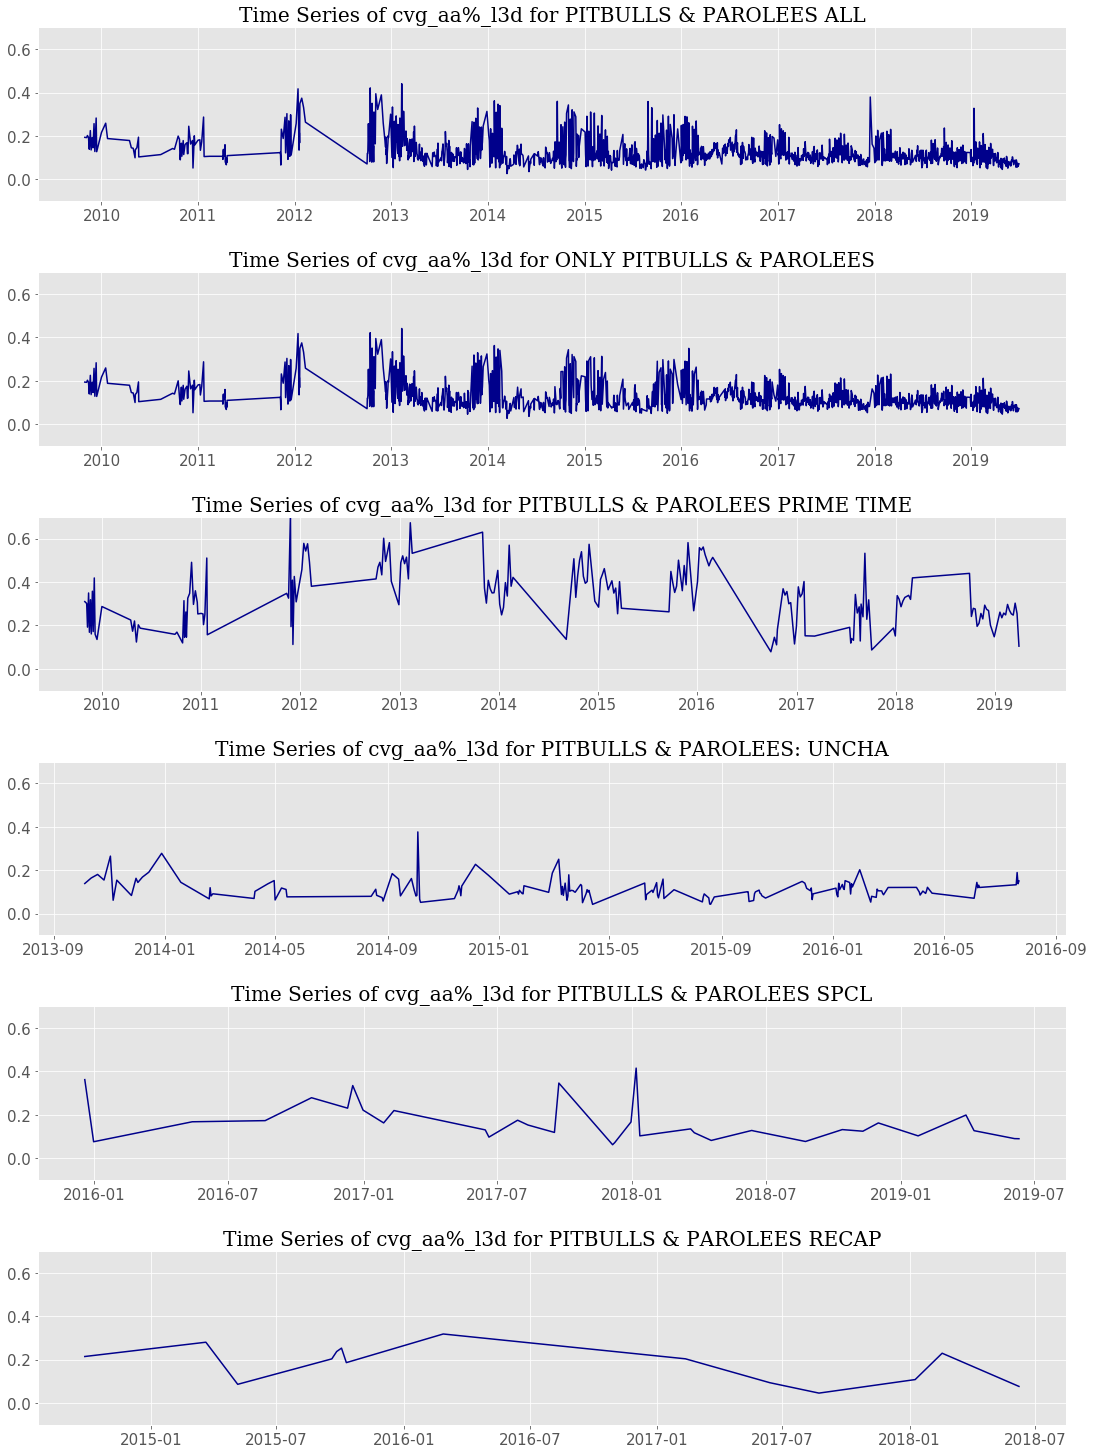

<function time_series_plot at 0x1a19814048>



COVERAGE RATING L3+ BY PRIME TIME


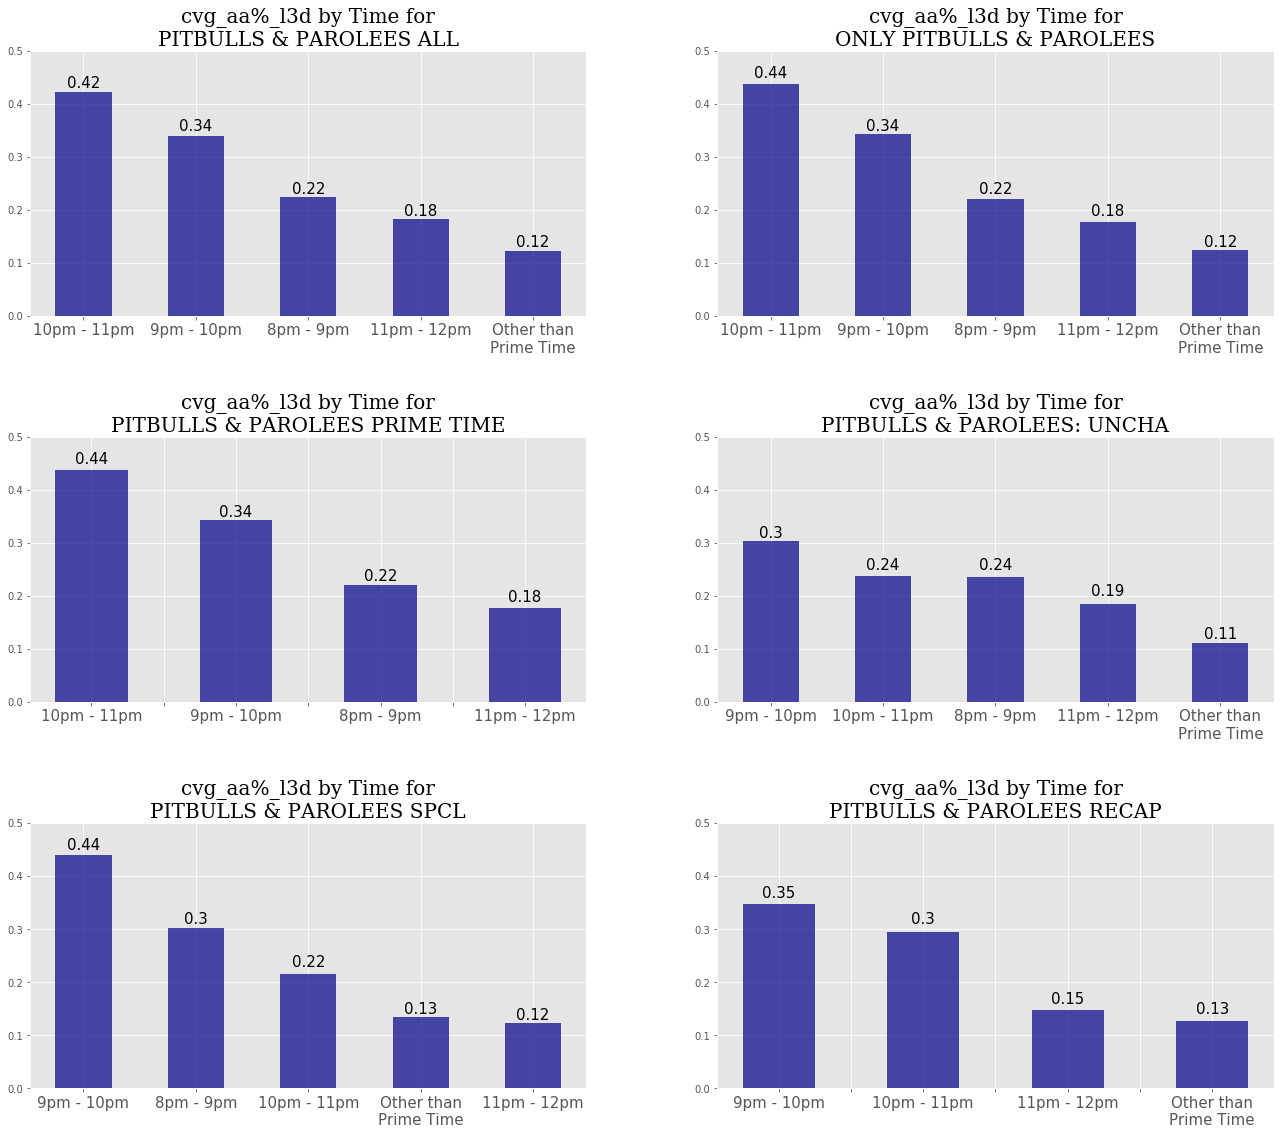

<function bar_chart_by_time at 0x1a19814268>




NATIONAL RATING C3+ BY DAY OF THE WEEK



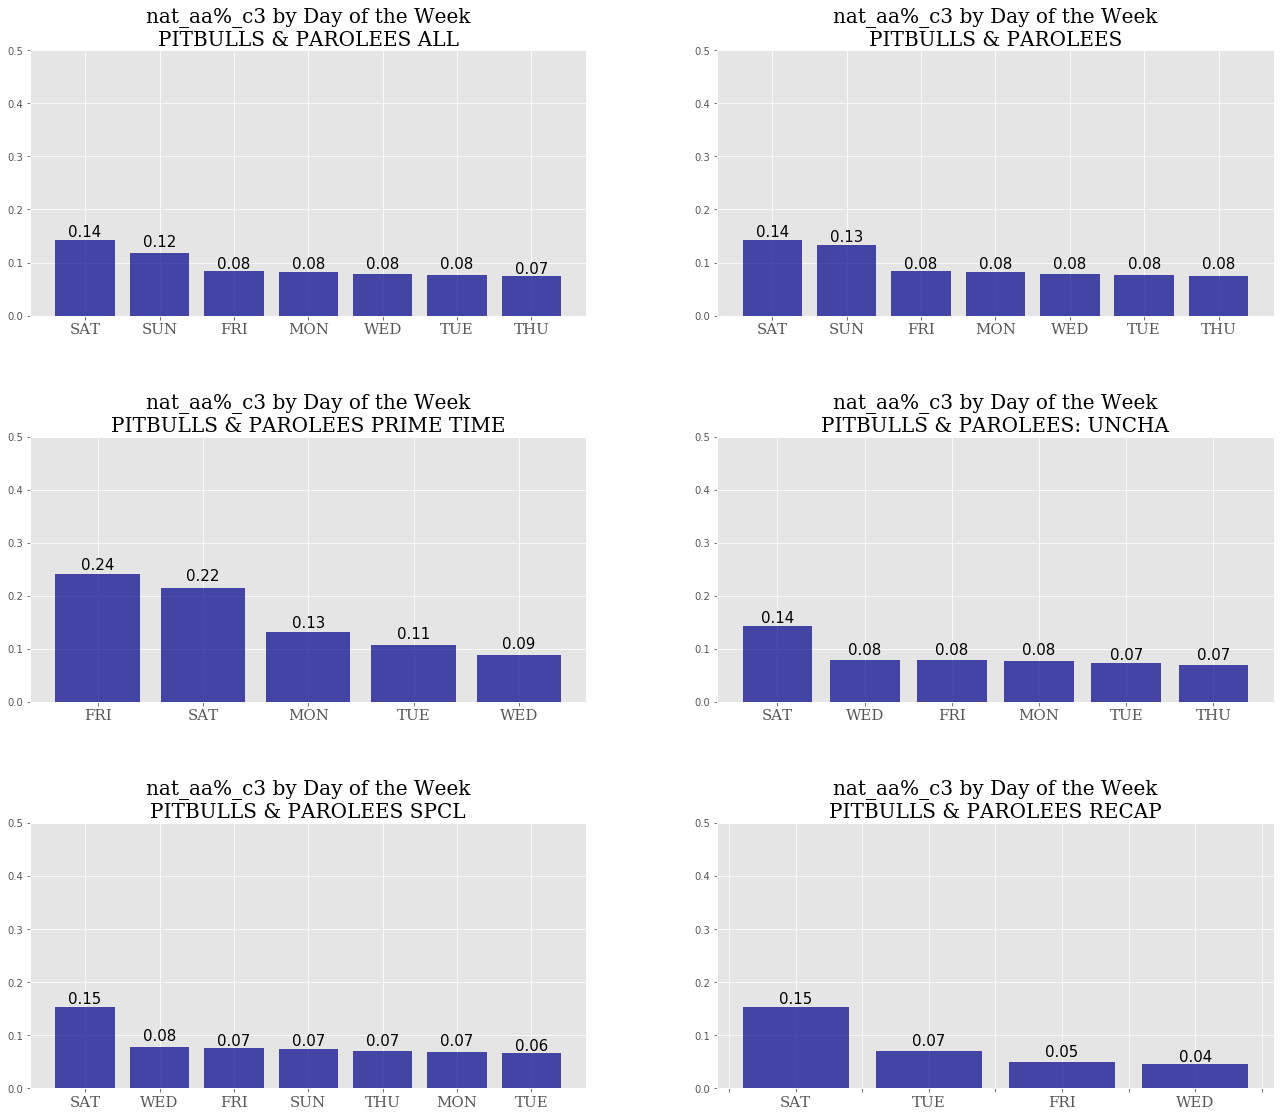

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR NATIONAL RATING C3+



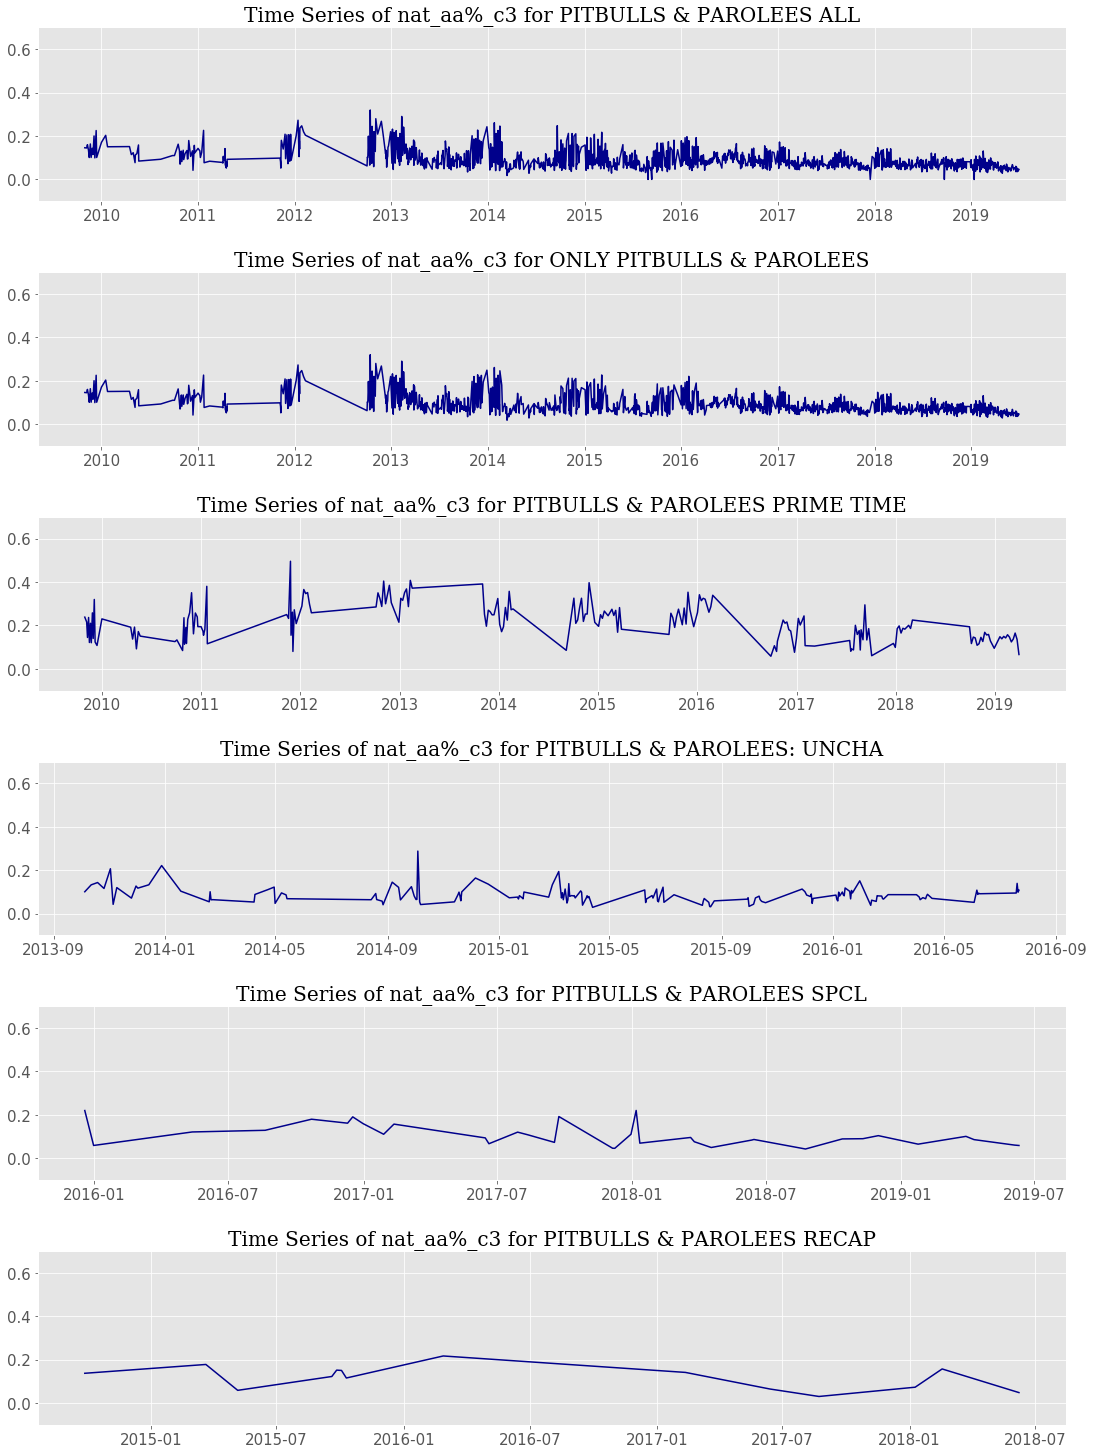

<function time_series_plot at 0x1a19814048>



NATIONAL RATING C3+ BY PRIME TIME


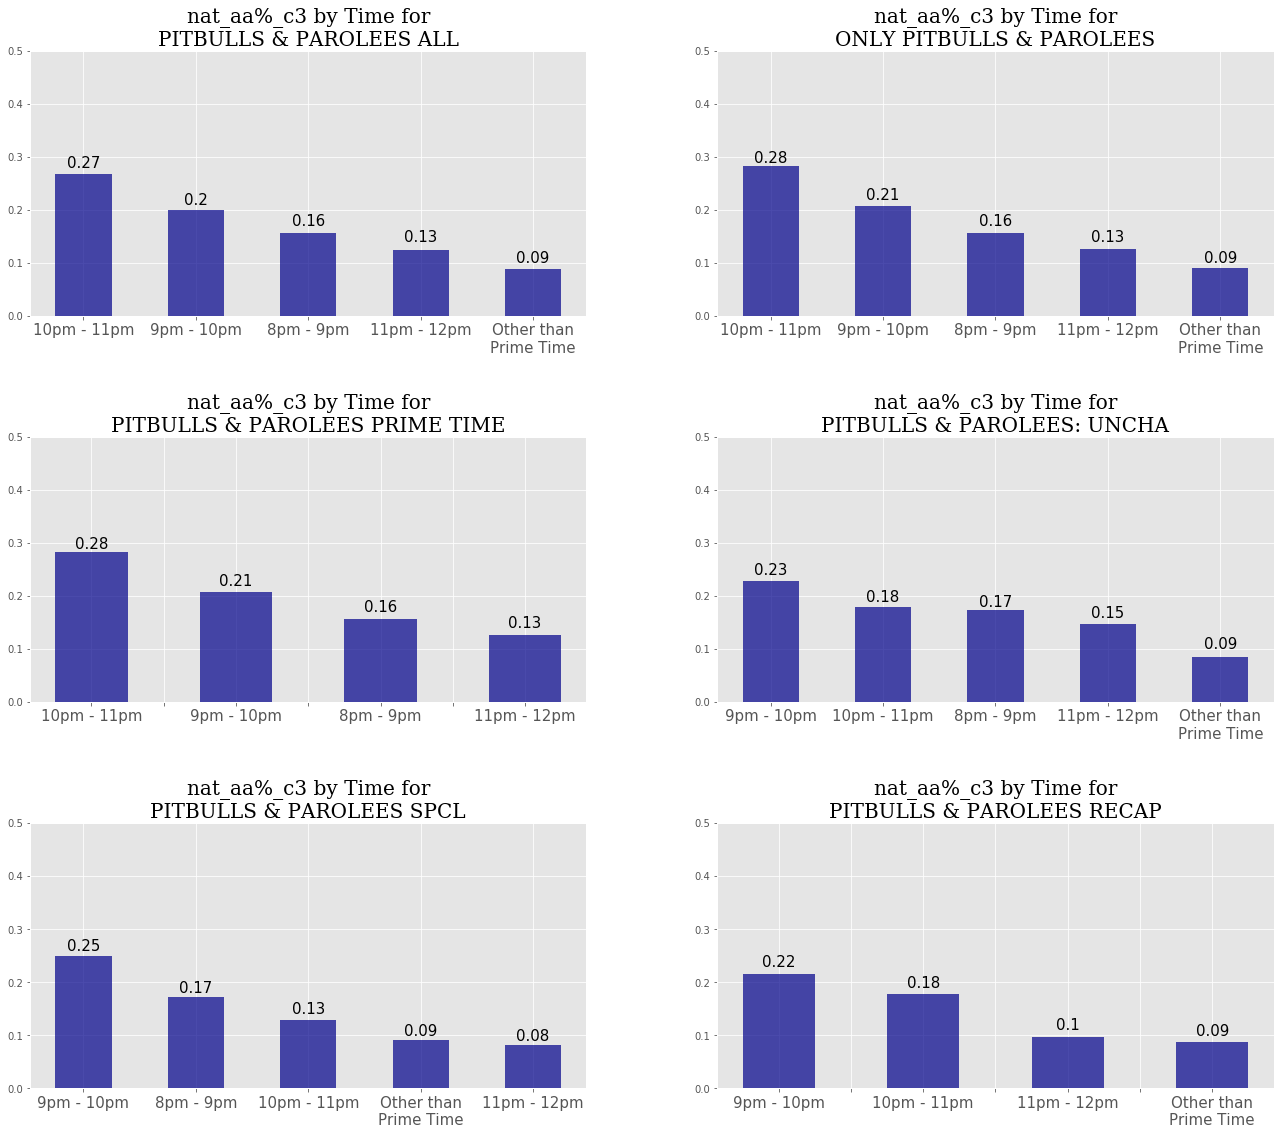

<function bar_chart_by_time at 0x1a19814268>




COVERAGE RATING C3+ BY DAY OF THE WEEK



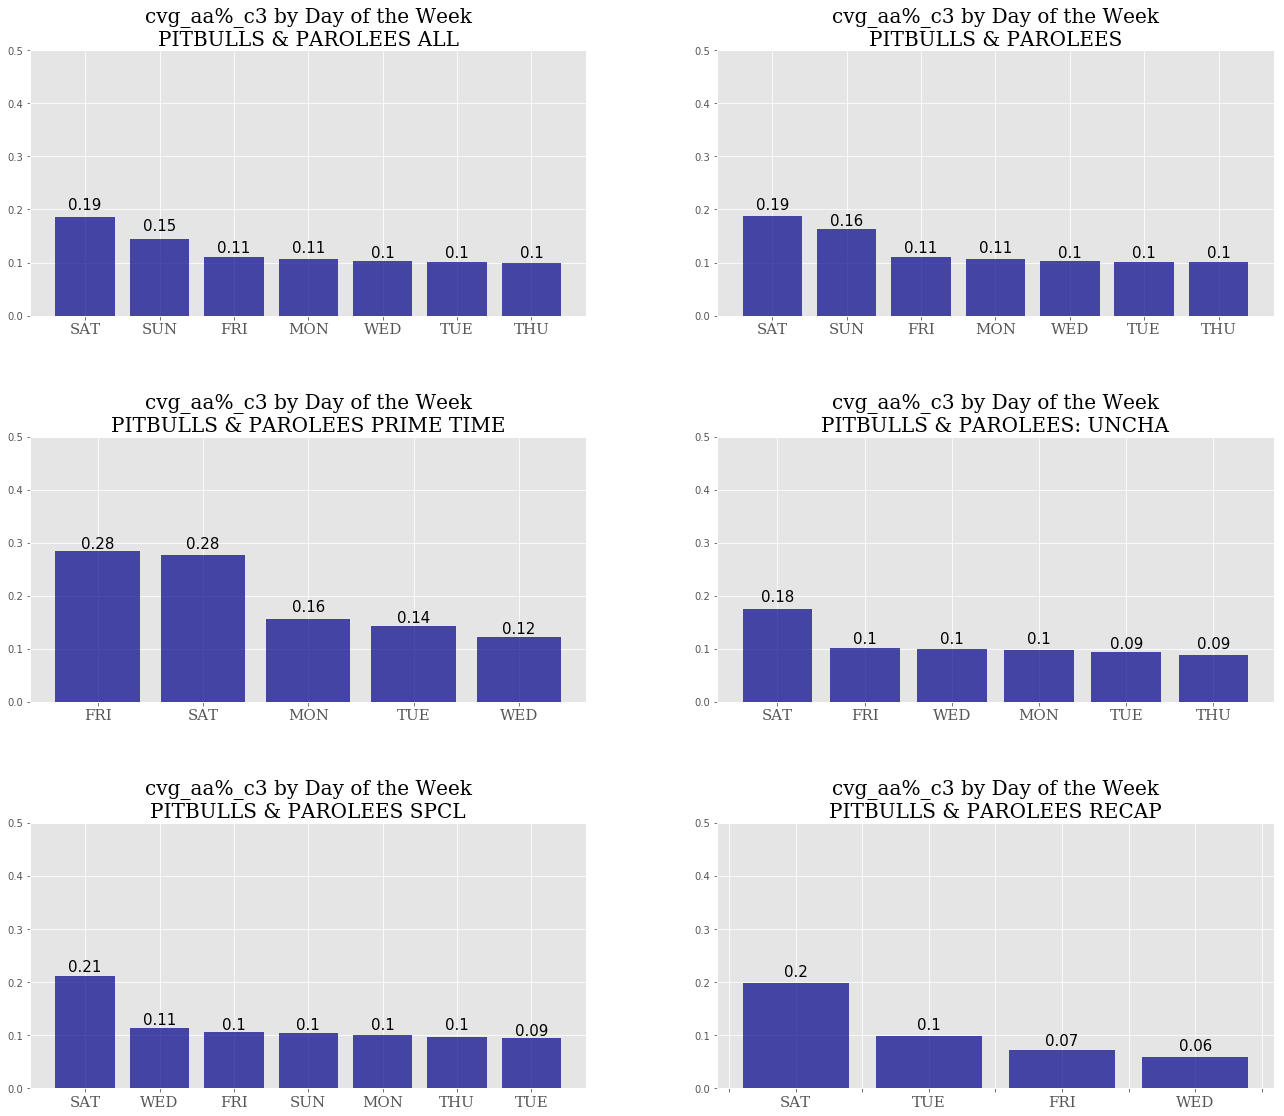

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR COVERAGE RATING C3+



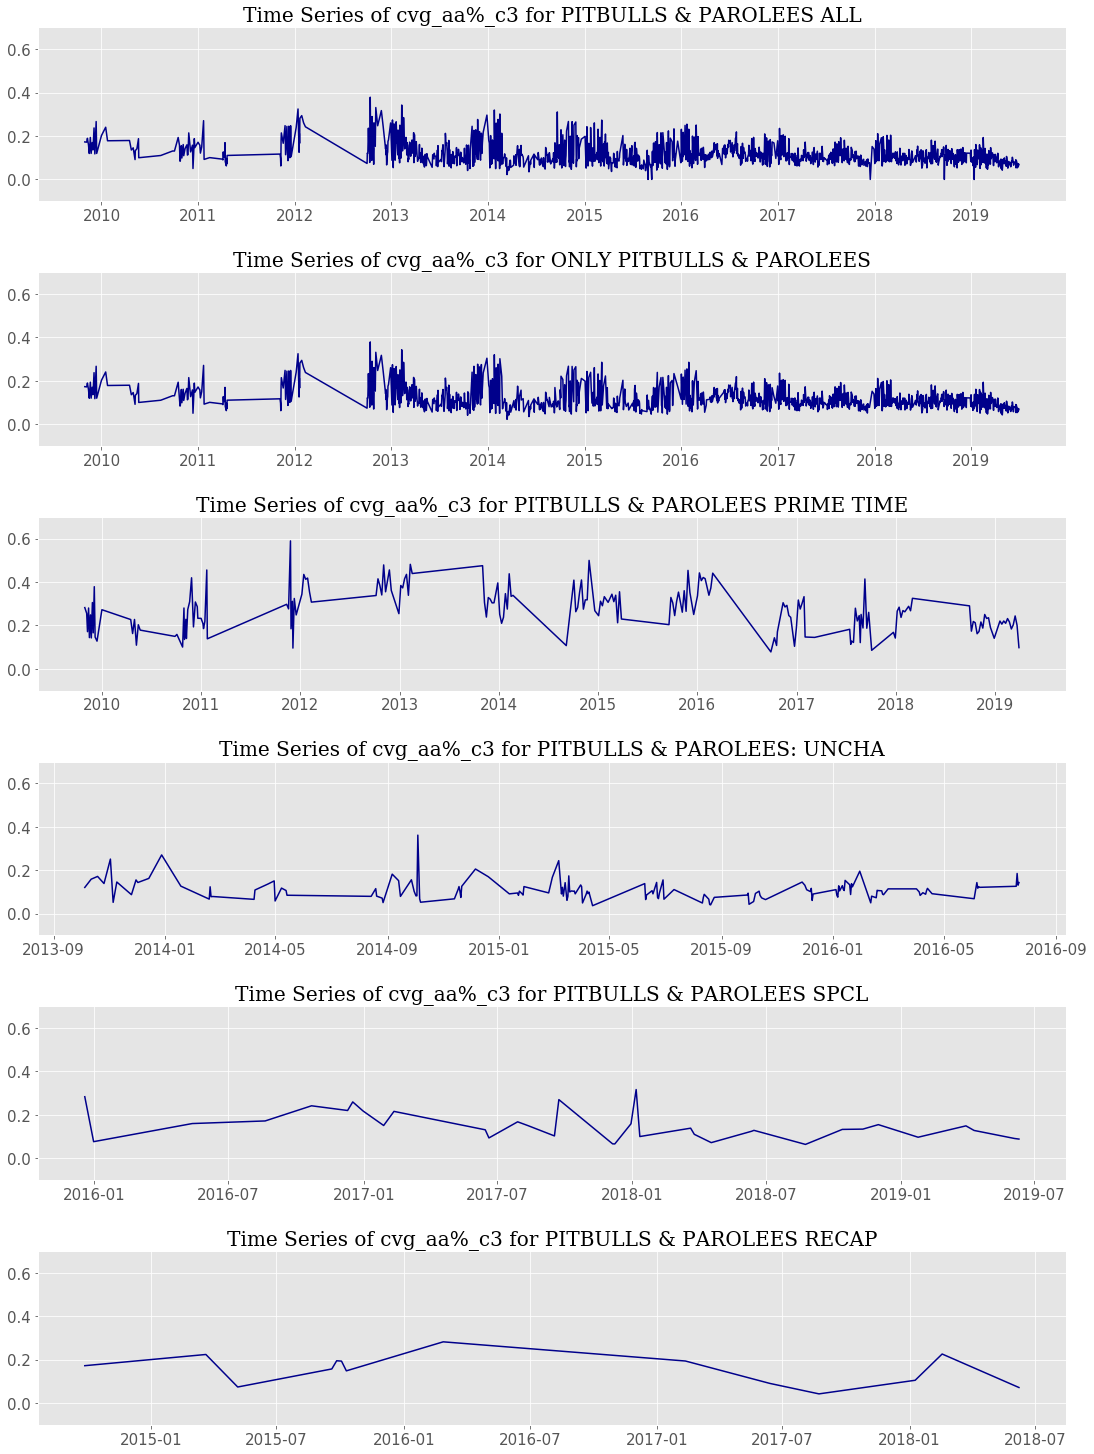

<function time_series_plot at 0x1a19814048>



COVERAGE RATING C3+ BY PRIME TIME


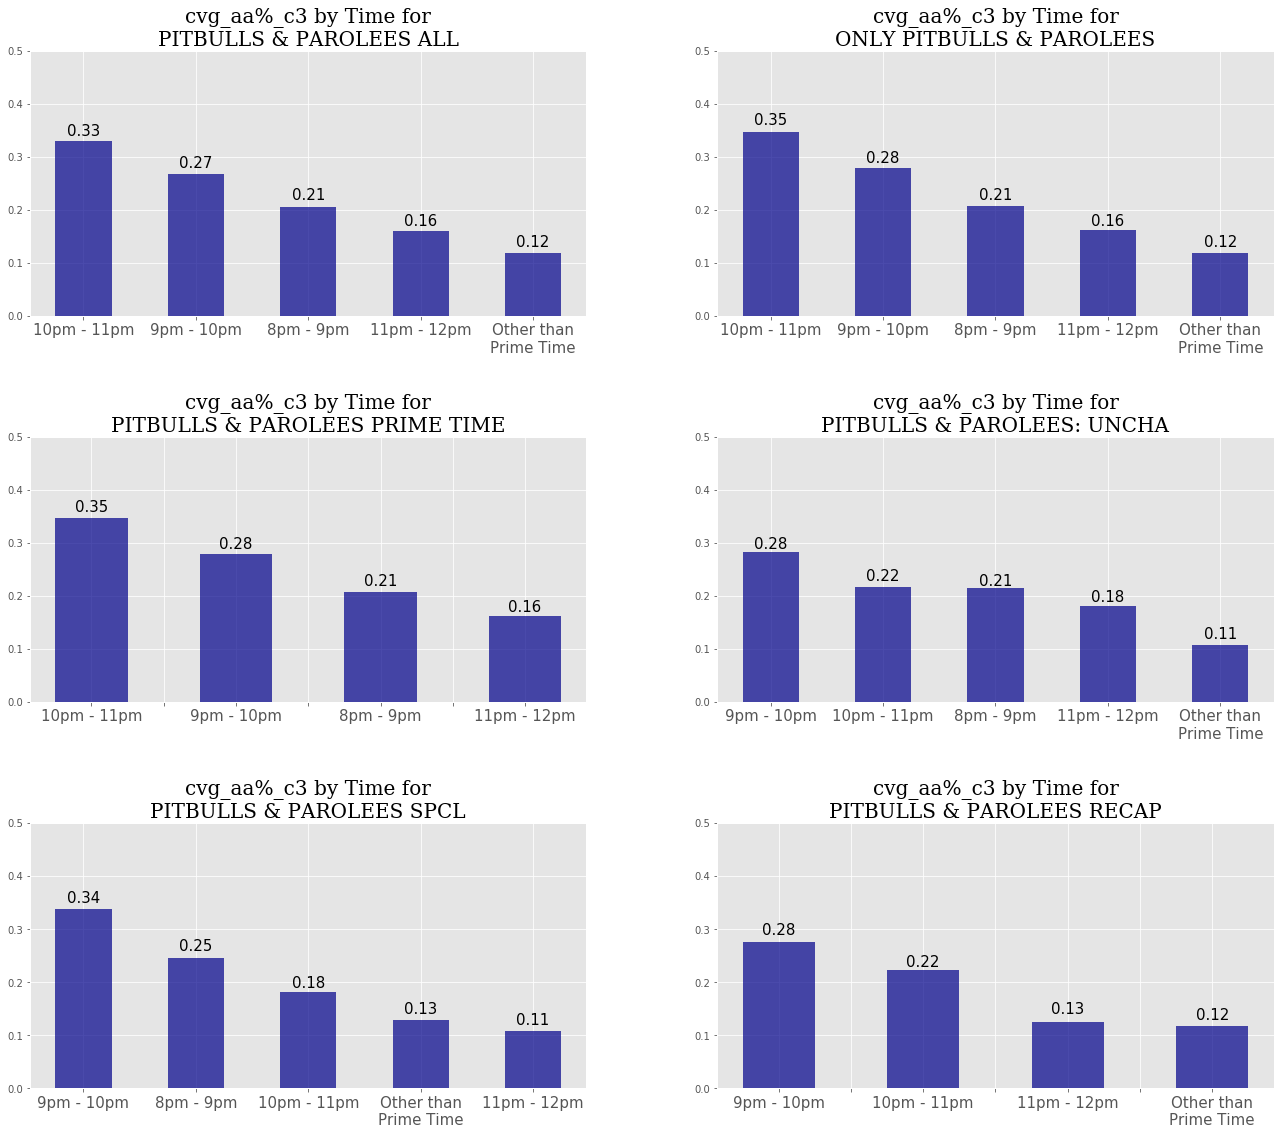

<function bar_chart_by_time at 0x1a19814268>




C3/L3 BY DAY OF THE WEEK



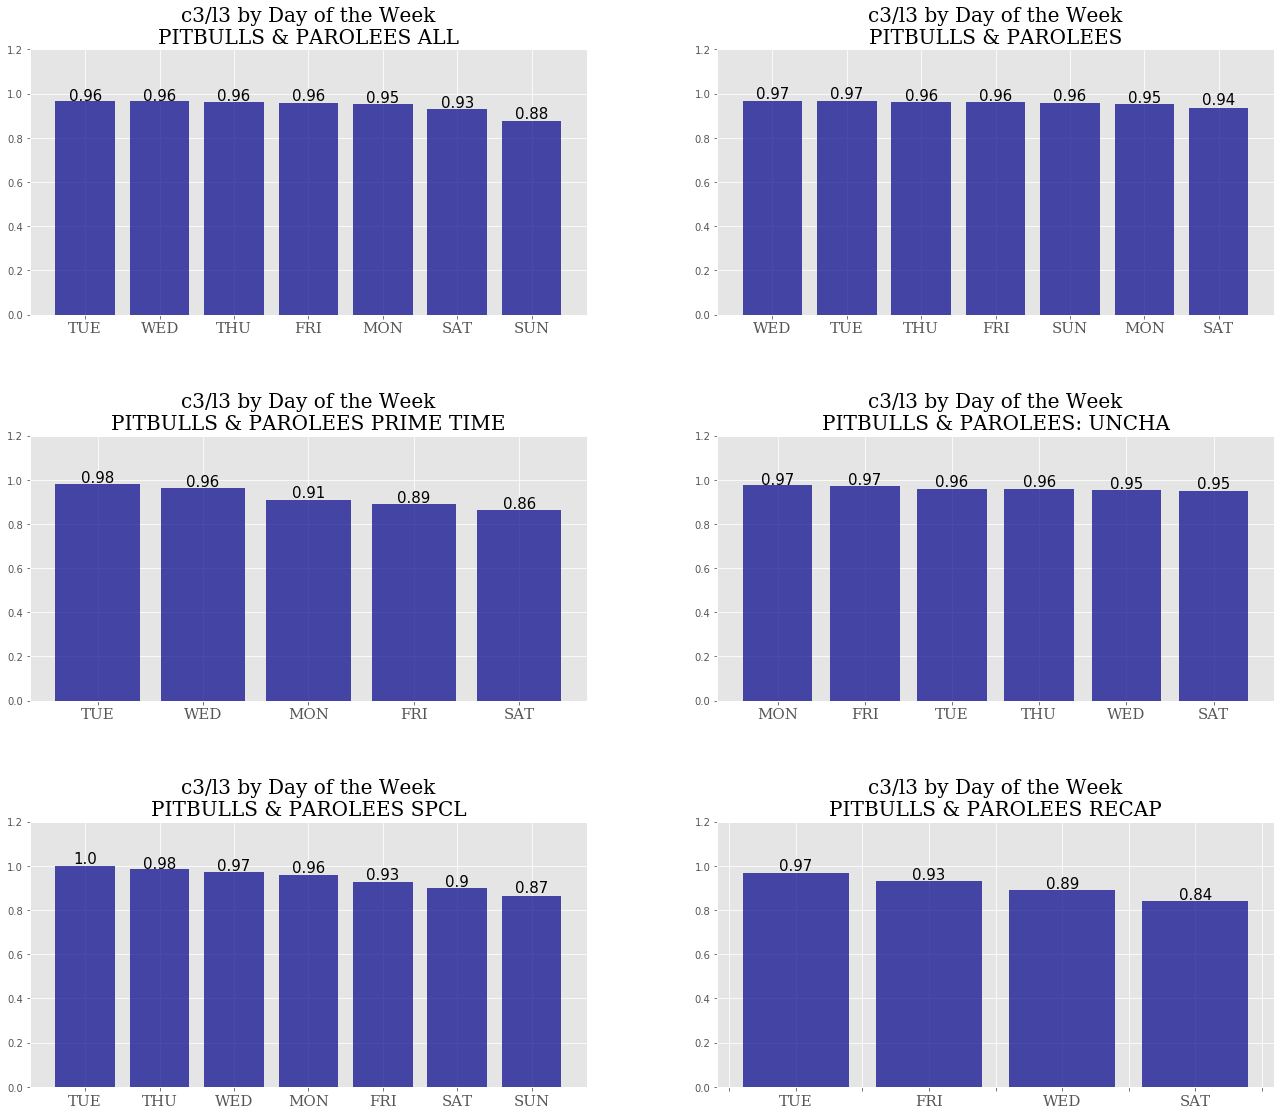

<function bar_chart_by_day at 0x1a182e79d8>



TIME SERIES FOR C3/L3



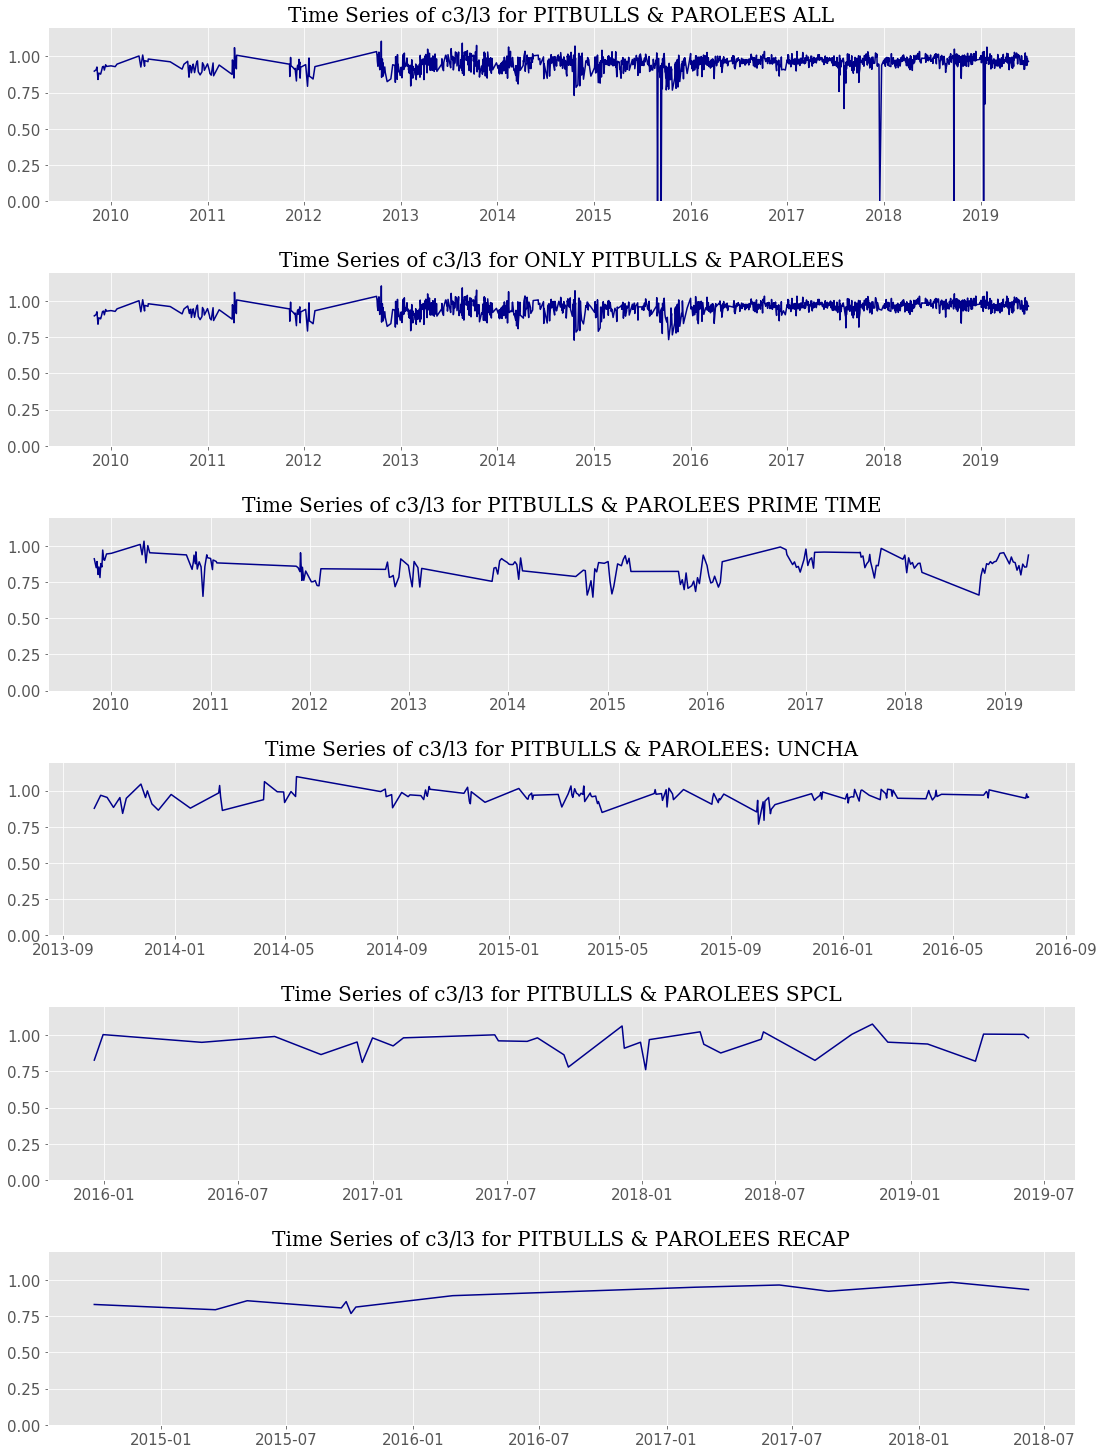

<function time_series_plot at 0x1a19814048>



C3/L3 BY PRIME TIME


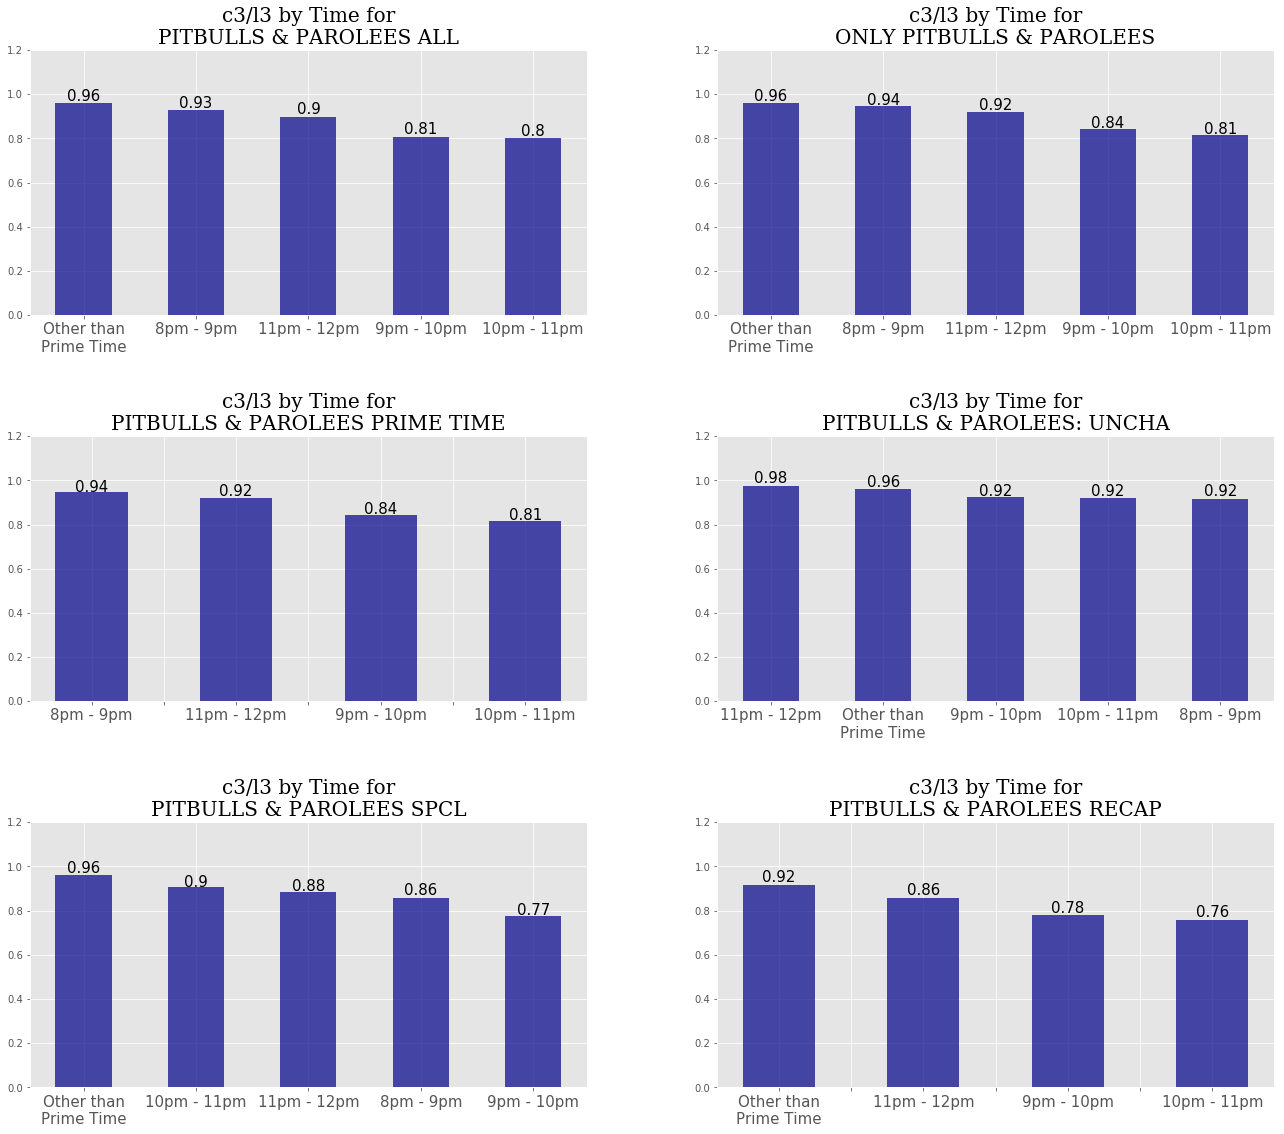

<function bar_chart_by_time at 0x1a19814268>



In [600]:
ratings=['nat_aa%_pal','cvg_aa%_pal','nat_aa%_lsd',\
         'cvg_aa%_lsd','nat_aa%_l3d','cvg_aa%_l3d','nat_aa%_c3','cvg_aa%_c3','c3/l3']
ratings_name=['NATIONAL RATING L1','COVERAGE RATING L1','NATIONAL RATING L1+', 'COVERAGE RATING L1+',\
             'NATIONAL RATING L3+','COVERAGE RATING L3+','NATIONAL RATING C3+','COVERAGE RATING C3+','C3/L3']
for rating,name in zip(ratings, ratings_name):
    print ()
    print ()
    print()
    print ('\033[1m'+ name + ' BY DAY OF THE WEEK'+'\033[0m')
    print()
    if name =='C3/L3':
        print (bar_chart_by_day(rating, ylim=[0,1.2]))
    else:
        print (bar_chart_by_day(rating))
    print ()
    print ()
    print ()
    print ('\033[1m'+ 'TIME SERIES FOR ' + name +'\033[0m')
    print()
    if name =='C3/L3':
        print (time_series_plot(rating, ylim=[0,1.2]))
    else:
        print (time_series_plot(rating))
    print ()
    print ()
    print ()
    print ('\033[1m'+ name + ' BY PRIME TIME'+'\033[0m')
    if name =='C3/L3':
        print (bar_chart_by_time(rating, ylim=[0,1.2]))
    else:
        print (bar_chart_by_time(rating))
    print()